# Problem Statement - UL Project - Coded

## Context

AllLife Bank wants to focus on its credit card customer base in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the Marketing team proposes to run personalized campaigns to target new customers as well as upsell to existing customers. Another insight from the market research was that the customers perceive the support services of the back poorly. Based on this, the Operations team wants to upgrade the service delivery model, to ensure that customer queries are resolved faster. The Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help.

## Objective

To identify different segments in the existing customers, based on their spending patterns as well as past interaction with the bank, using clustering algorithms, and provide recommendations to the bank on how to better market to and service these customers.

## Data Description

The data provided is of various customers of a bank and their financial attributes like credit limit, the total number of credit cards the customer has, and different channels through which customers have contacted the bank for any queries (including visiting the bank, online, and through a call center).

**Data Dictionary**

- Sl_No: Primary key of the records
- Customer Key: Customer identification number
- Average Credit Limit: Average credit limit of each customer for all credit cards
- Total credit cards: Total number of credit cards possessed by the customer
- Total visits bank: Total number of visits that the customer made (yearly) personally to the bank
- Total visits online: Total number of visits or online logins made by the customer (yearly)
- Total calls made: Total number of calls made by the customer to the bank or its customer service department (yearly)

# **Importing necessary libraries**

In [1]:
pip install yellowbrick

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to perform PCA
from sklearn.decomposition import PCA

# to suppress warnings
import warnings

warnings.filterwarnings("ignore")

# **Loading the dataset**

In [3]:
# loading the dataset
data = pd.read_excel("Credit+Card+Customer+Data.xlsx")

# **Overview of the Dataset**

The initial steps to get an overview of any dataset is to:
- observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- get information about the number of rows and columns in the dataset
- find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- check the statistical summary of the dataset to get an overview of the numerical columns of the data

### Displaying first 5 and last 5 rows of the dataset

In [4]:
# viewing the first 5 rows of the data
data.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [5]:
data.tail()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
655,656,51108,99000,10,1,10,0
656,657,60732,84000,10,1,13,2
657,658,53834,145000,8,1,9,1
658,659,80655,172000,10,1,15,0
659,660,80150,167000,9,0,12,2


### Checking the shape of the dataset

In [6]:
data.shape

(660, 7)

* The dataset has 660 rows and 7 columns

### Creating a copy of original data

In [7]:
# copying the data to another variable to avoid any changes to original data
df = data.copy()

### Checking the data types of the columns for the dataset

In [8]:
# checking datatypes and number of non-null values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


**Observations**
- All columns have non-null values for all 660 entries, indicating there are no missing values in this dataset.
- All columns are of integer type (int64), suggesting they represent discrete, countable values.

### Feature Engineering 

In [9]:
# we will drop the Sl_No column add it adds no value to the analysis
df.drop("Sl_No", axis=1, inplace=True)

In [10]:
#To get the value counts of Customer Key
df['Customer Key'].value_counts()

Customer Key
97935    2
50706    2
47437    2
37252    2
96929    2
        ..
73811    1
72892    1
51773    1
96163    1
80150    1
Name: count, Length: 655, dtype: int64

In [11]:
# Find duplicated Customer Keys
df[df['Customer Key'].duplicated()]

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
332,47437,17000,7,3,1,0
398,96929,67000,6,2,2,2
432,37252,59000,6,2,1,2
541,50706,60000,7,5,2,2
632,97935,187000,7,1,7,0


In [12]:
# checking if the records are duplictaes
df[df['Customer Key']==47437] 

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
4,47437,100000,6,0,12,3
332,47437,17000,7,3,1,0


In [13]:
df[df['Customer Key']==96929]  

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
391,96929,13000,4,5,0,0
398,96929,67000,6,2,2,2


In [14]:
df[df['Customer Key']==37252] 

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
48,37252,6000,4,0,2,8
432,37252,59000,6,2,1,2


In [15]:
df[df['Customer Key']==50706] 

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
411,50706,44000,4,5,0,2
541,50706,60000,7,5,2,2


In [16]:
df[df['Customer Key']==97935]

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
104,97935,17000,2,1,2,10
632,97935,187000,7,1,7,0


- Duplicate IDs do not indicate duplicate records. This may be due to the same customer having accounts in different branches. Therefore, I will leave the data as is.

### Checking the missing values

In [17]:
# checking for missing values
df.isnull().sum()

Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

- There are no missing values in the data.

### Checking for duplicates values

In [18]:
# checking for duplicate values
df.duplicated().sum()

0

- There are no duplicate values in the data.

### Statistical summary of the dataset

In [19]:
# let's look at the statistical summary of the data
df.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
Customer Key,660.0,55141.443939,25627.772200,11265.0,33825.25,53874.5,77202.5,99843.0
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.00,18000.0,48000.0,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.00,5.0,6.0,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.00,2.0,4.0,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.00,2.0,4.0,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.00,3.0,5.0,10.0


**Observations**

- There is considerable variation in customer behavior, particularly in credit limits, online visits, and calls made.
- Most customers have a moderate number of credit cards and visit both the bank and online services occasionally, but a few are much more frequent users of online services.
- While the number of visits and calls is low for many, some customers are very active, particularly online.

In [20]:
#To understand the data statistics 
df.describe()

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


`Avg_Credit_Limit:`
- The mean credit limit of 34,574 shows that, while a considerable number of customers have relatively moderate limits, some have credit limits as high as 200,000.
- The high standard deviation (37,625) and the gap between the 75th percentile (48,000) and the maximum (200,000) suggest a right-skewed distribution, with a few customers having very high credit limits.

`Total_Credit_Cards:`
- The average number of credit cards is around 4.7, with most customers holding between 3 and 6 cards.
- The maximum of 10 credit cards highlights that while most customers fall within a common range, there is a subset with a high number of cards.
  
`Total_visits_bank:` 
- With an average of 2.4 visits and a maximum of 5, this metric indicates that bank visits are infrequent for most customers.
- Most customers fall between 1 and 4 visits, with the median at 2, suggesting a low in-branch interaction level.

`Total_visits_online:`
- Online visits show higher variability, with a mean of 2.6 visits and a standard deviation of 2.94.
- While the majority have between 1 and 4 visits, some customers have visited the online platform as many as 15 times, indicating a small group of highly engaged online users.
  
`Total_calls_made:`
- The average number of calls is 3.6, with most customers making 1 to 5 calls.
- The maximum of 10 calls indicates a subset of customers who might prefer phone contact over other interaction methods.

In [21]:
#To check those that have zero Total_visit_bank
df[(df.Total_visits_bank == 0)].describe()

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,100.000000,100.000000,100.000000,100.0,100.000000,100.000000
mean,57080.750000,39150.000000,3.540000,0.0,5.030000,5.820000
std,24648.944629,56004.035749,2.698372,0.0,3.616614,3.085908
min,12122.000000,3000.000000,1.000000,0.0,1.000000,0.000000
25%,36753.000000,9000.000000,2.000000,0.0,3.000000,4.000000
50%,54640.000000,14000.000000,3.000000,0.0,4.000000,6.000000
75%,78785.250000,20000.000000,4.000000,0.0,5.000000,8.000000
max,99596.000000,200000.000000,10.000000,0.0,15.000000,10.000000


- There are about 100 customers who never visited the bank, who had zero visit to banks, but they had minimum of 1 online visit, which means those who never visit the bank actulally visit online.

In [22]:
#To check those that have zero Total_visits_online, 
df[(df.Total_visits_online == 0)].describe()

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,144.000000,144.000000,144.000000,144.000000,144.0,144.000000
mean,55958.270833,35131.944444,5.534722,3.506944,0.0,2.069444
std,26555.689108,22971.324943,1.211329,1.176676,0.0,1.475453
min,11466.000000,5000.000000,4.000000,2.000000,0.0,0.000000
25%,33080.250000,13750.000000,4.000000,2.000000,0.0,1.000000
50%,56274.500000,35000.000000,6.000000,3.500000,0.0,2.000000
75%,79155.250000,56000.000000,7.000000,5.000000,0.0,3.000000
max,99437.000000,75000.000000,7.000000,5.000000,0.0,4.000000


- There are 144 customers who never visited online but they have minimum of 2 visit to banks which means those who never contacted online actually visited the bank at a minimum of two visits actually

In [23]:
#To check those that have zero Total_calls_made, 
df[(df.Total_calls_made ==0)].describe()

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,97.000000,97.000000,97.000000,97.000000,97.000000,97.0
mean,55700.484536,54536.082474,5.979381,2.989691,2.587629,0.0
std,26819.345928,50142.725847,1.707699,1.510345,4.094591,0.0
min,11265.000000,6000.000000,2.000000,0.000000,0.000000,0.0
25%,34677.000000,16000.000000,5.000000,2.000000,0.000000,0.0
50%,50598.000000,41000.000000,6.000000,3.000000,1.000000,0.0
75%,81531.000000,70000.000000,7.000000,4.000000,2.000000,0.0
max,99284.000000,200000.000000,10.000000,5.000000,15.000000,0.0


- There are 97 customers who never made a call and there are people who never made a call, never contact online and never visited the bank based on the fact that the minimum was zero in all the three

In [24]:
# selecting numerical columns
num_col = df.select_dtypes(include=['number']).drop(columns=['Customer Key'], errors='ignore')

In [25]:
# Check the DataFrame
print(num_col.dtypes)

Avg_Credit_Limit       int64
Total_Credit_Cards     int64
Total_visits_bank      int64
Total_visits_online    int64
Total_calls_made       int64
dtype: object


- For a clustering analysis aimed at segmenting customers based on spending patterns and interactions with the bank, the Customer Key itself is not required as a feature in the clustering process.
- Exclude Customer Key from the clustering process to avoid it influencing the algorithm.

# **Exploratory Data Analysis**

## Functions for EDA

In [26]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [27]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

## Univariate analysis

`Avg_Credit_Limit`

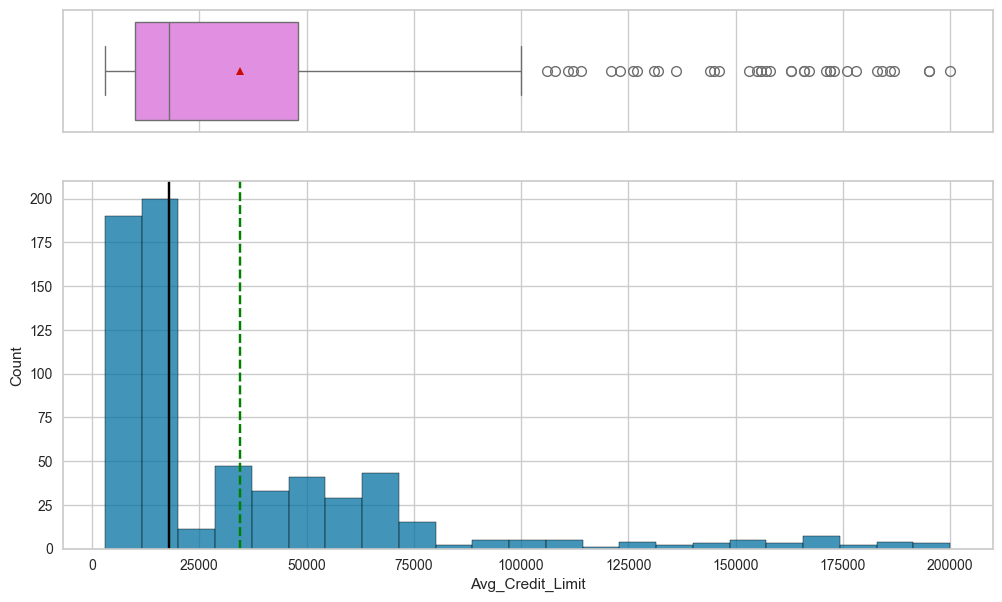

In [28]:
histogram_boxplot(df, "Avg_Credit_Limit")

`Boxplot (Top Plot):`
- The boxplot shows the distribution of the Avg_Credit_Limit variable.
- The median (center line inside the box) is around 18,000, indicating that half of the customers have a credit limit below this value.
- There are a significant number of outliers beyond the upper whisker, with some credit limits going up to 200,000. These outliers represent customers with much higher credit limits compared to the general population.
- The interquartile range (IQR), which is the range between the 25th percentile and the 75th percentile, spans a wide range, indicating a significant variation in credit limits.
  
`Histogram (Bottom Plot):`
- The histogram illustrates that most customers have relatively low credit limits, with a large concentration in the lower range (below 25,000).
- The distribution is right-skewed, meaning there are fewer customers with very high credit limits. This is confirmed by the gradual decrease in counts as the credit limit increases beyond 25,000.
- The black vertical line represents the mean (approximately 34,574), which is higher than the median, further confirming the presence of high-value outliers that pull the average upwards.
- The green dashed line might indicate a threshold or specific point of interest (e.g., a threshold for a high-value customer segment).

**Observation**
- The Avg_Credit_Limit data is heavily right-skewed, with most customers having lower credit limits, and a smaller group having very high limits.
- The presence of a large number of outliers suggests that segmentation based on credit limits could reveal distinct customer groups, such as high-value versus low-value customers.

`Total_Credit_Cards`

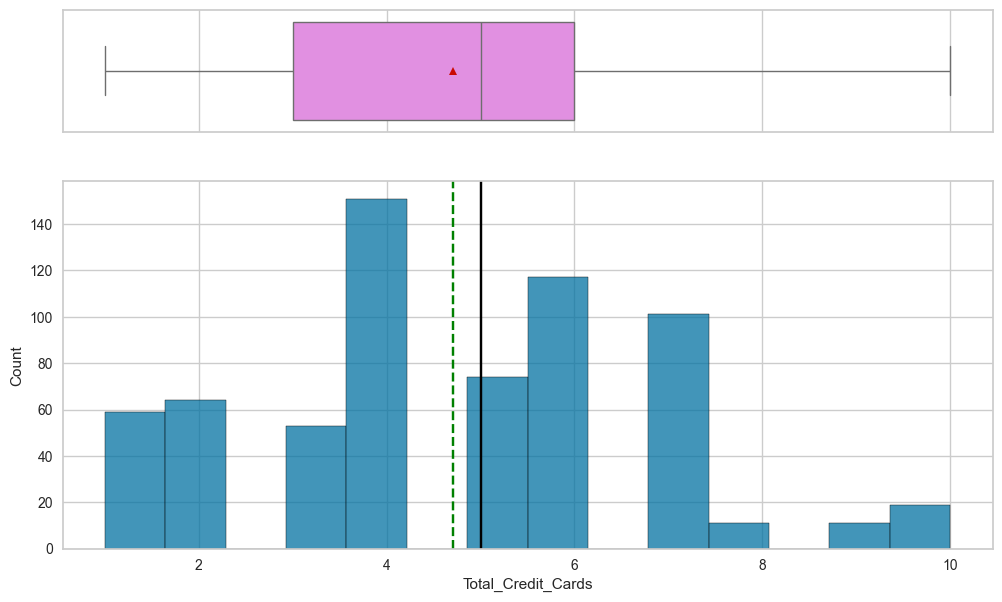

In [29]:
histogram_boxplot(df, "Total_Credit_Cards")

`Boxplot (Top Plot):`
- The median number of credit cards is around 5, indicating that half of the customers have 5 or fewer credit cards.
- The box (interquartile range) spans from about 3 to 6 credit cards, suggesting that most customers have between 3 and 6 cards.
- There are no significant outliers in this dataset, as all data points are within the whiskers of the boxplot.
- The mean (represented by the red triangle) seems to be slightly below 5, indicating a slight left skew in the data.
  
`Histogram (Bottom Plot):`
- The distribution of credit cards shows a bimodal pattern with peaks at 4 and 6 cards.
- Most customers hold between 4 and 6 credit cards, as shown by the high bars in this range.
- A smaller number of customers hold fewer than 3 cards or more than 7, as indicated by the lower bars on the left and right extremes.
- The black vertical line represents the mean number of credit cards, which is around 4.7, consistent with the boxplot.
- The green dashed line could represent a threshold or a point of interest, likely separating customer groups based on their card ownership.

**Observation** 
- The Total_Credit_Cards variable shows that the majority of customers hold between 4 and 6 credit cards, with fewer customers holding a very low or very high number of cards.
- The lack of outliers suggests that there’s a relatively consistent range of credit card ownership among customers.
- The bimodal distribution indicates the possibility of segmenting customers into groups based on the number of cards they hold, potentially identifying different spending behaviors or needs.

`Total_visits_bank`

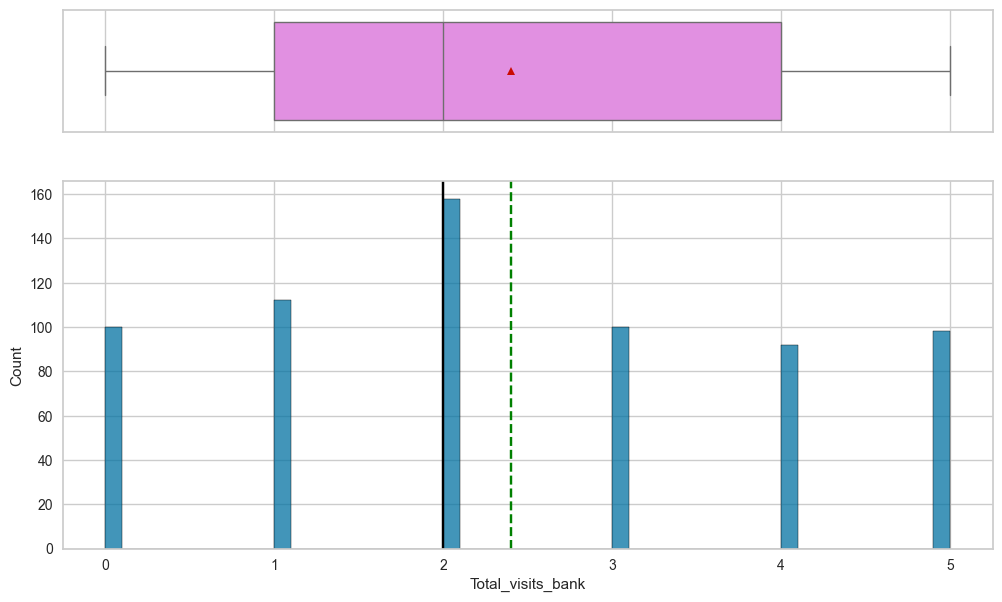

In [30]:
histogram_boxplot(df, "Total_visits_bank", bins=50)

`Boxplot (Top Plot):`
- The median number of bank visits is 2, indicating that half of the customers visited the bank two or fewer times.
- The interquartile range (IQR) spans from about 1 to 4, meaning that most customers visit the bank between 1 and 4 times.
- There are no significant outliers, as the whiskers extend to the minimum (0 visits) and the maximum (5 visits), and no data points fall outside these limits.
- The mean (indicated by the red triangle) seems to be just above 2, showing a slight right skew in the data.
  
`Histogram (Bottom Plot):`
- The distribution of visits shows a distinct pattern, with five clear peaks, representing customers who visited the bank 0, 1, 2, 3, 4, or 5 times.
- The most common number of visits is 2, as shown by the highest bar around this value.
- The distribution is symmetric, with roughly equal numbers of customers at the extremes (0 and 5 visits).
- The black vertical line represents the mean, which aligns closely with 2, and the green dashed line could represent a threshold or point of interest.

**Observation**
- The number of visits to the bank is quite discrete and limited, with most customers visiting 2 times.
- The absence of outliers suggests a consistent pattern in bank visits among customers, but the symmetric distribution indicates different behaviors: some customers visit the bank frequently (4-5 visits), while others do not visit at all or only visit once.
- This variable could help segment customers based on their banking behavior, where frequent visitors may need different services compared to those who visit rarely or not at all.

`Total_visits_online`

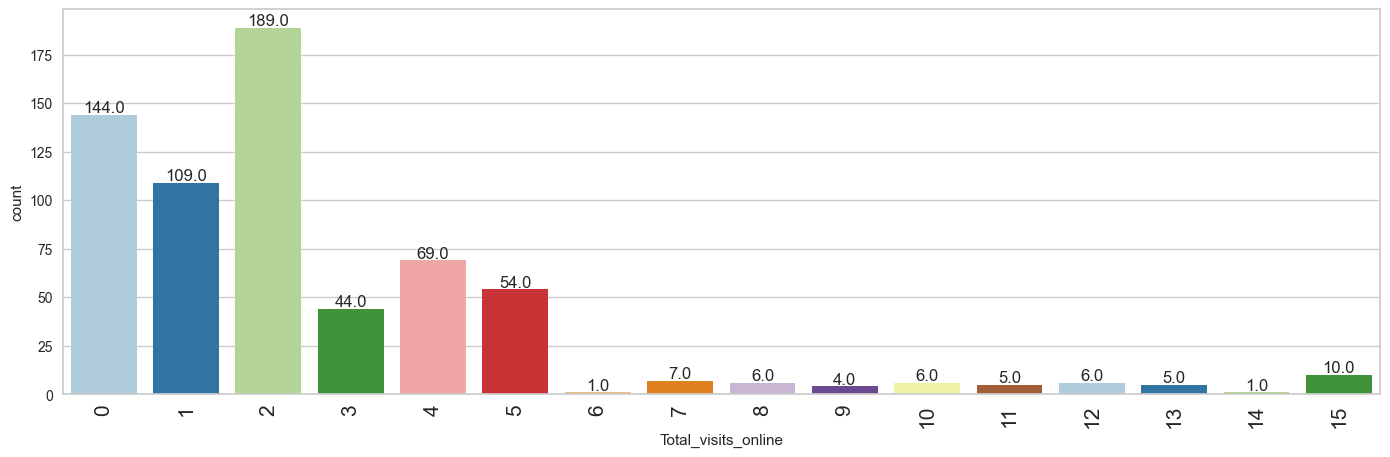

In [31]:
labeled_barplot(df, "Total_visits_online")

**Observation**
- Most customers made 2 online visits (189 instances), followed by 0 visits (144) and 1 visit (109).
- Very few customers made more than 5 visits.
- There's a noticeable drop-off in the number of customers with 6 or more visits.

`Total_calls_made `

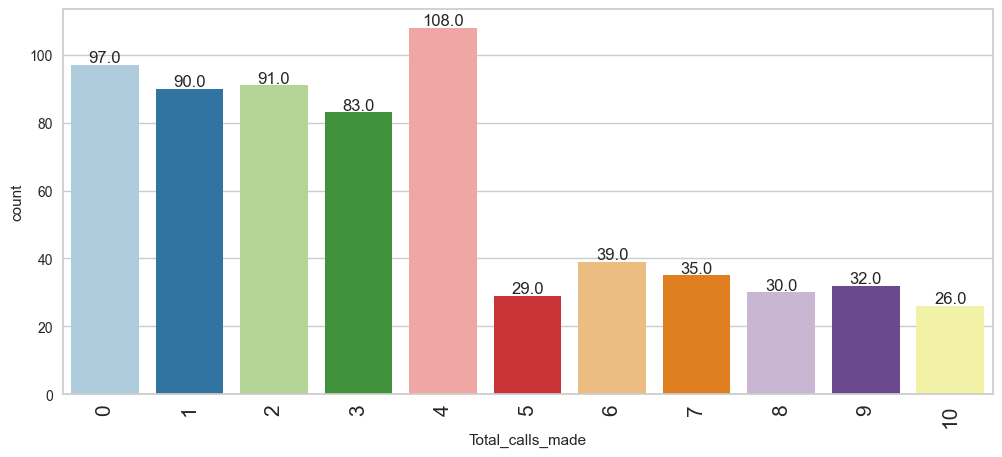

In [32]:
labeled_barplot(df, "Total_calls_made")

**Observation**
- The most frequent number of calls made is 4, with 108 instances, followed by 0 calls (97 instances).
- A significant portion of the customers made between 0 and 4 calls.
- As the number of calls increases beyond 4, the frequency decreases sharply.
- Customers making 5 or more calls are much fewer, and the distribution becomes more evenly spread between 29 and 39 instances for each category.

## Bivariate Analysis

In [33]:
# Custom function for stacked bar plot
def stacked_barplot(data, category_col, stacked_col):
    # Step 1: Create a crosstab to count occurrences of each combination
    stacked_data = pd.crosstab(data[category_col], data[stacked_col])
    
    # Step 2: Plot a stacked bar plot
    stacked_data.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
    plt.title(f'Stacked Bar Plot of {category_col} and {stacked_col}')
    plt.xlabel(category_col)
    plt.ylabel('Frequency')
    plt.legend(title=stacked_col)
    plt.show()


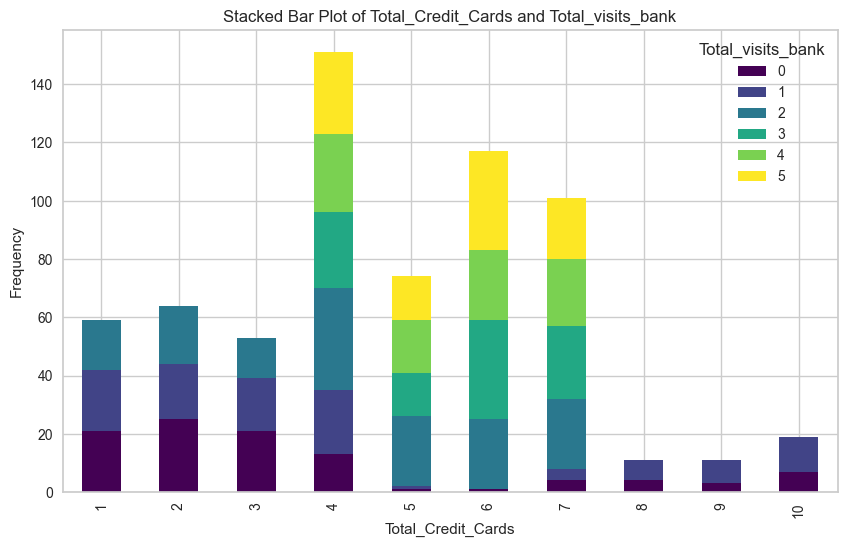

In [34]:
stacked_barplot(data,"Total_Credit_Cards","Total_visits_bank")

**Observation**
- For Total_Credit_Cards = 4, there is a high concentration of customers, with many having made between 1 and 5 visits to the bank. This group has the highest number of bank visits.
- There is a similarly high frequency for Total_Credit_Cards = 6, though slightly fewer customers visit the bank 4 or 5 times.
- For Total_Credit_Cards = 5, the number of bank visits is more evenly spread across the range, with fewer people reaching 4 or 5 visits.
- For credit card counts of 1 to 3, most people have made 0 to 3 visits, with fewer customers having made 4 or 5 visits.
- Credit card counts greater than 7 see a sharp decline in frequency, with most of these customers visiting the bank 0 or 1 time.
- This plot provides insights into how credit card ownership correlates with bank visits. Customers with 4 and 6 credit cards are more likely to visit the bank multiple times, while those with fewer or more credit cards have fewer bank visits.

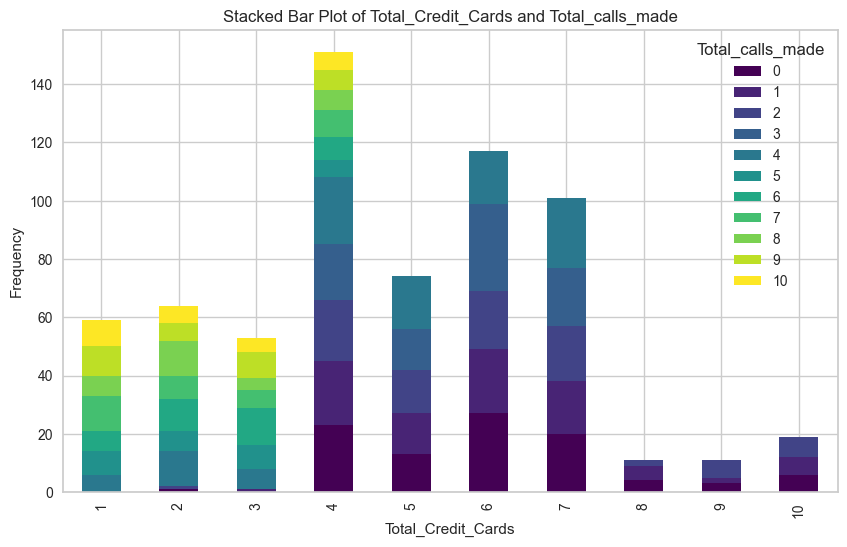

In [35]:
stacked_barplot(data,"Total_Credit_Cards","Total_calls_made")

**Observation**

- Customers with 4-7 credit cards are more frequent and tend to make a moderate number of calls (1-5 calls). These customers might represent a sweet spot in terms of engagement, balancing credit card usage with phone support.
- Customers with 8 or more credit cards are fewer and tend to make fewer calls, indicating less need for customer support or less reliance on phone-based services.
- Customers with fewer cards (1-3) are not heavily skewed towards any particular call frequency, suggesting a broad range of engagement levels.
- This suggests that customers with moderate credit card holdings (4-7 cards) are more likely to interact with customer service, whereas both the low and high ends of credit card holders may require different engagement strategies.

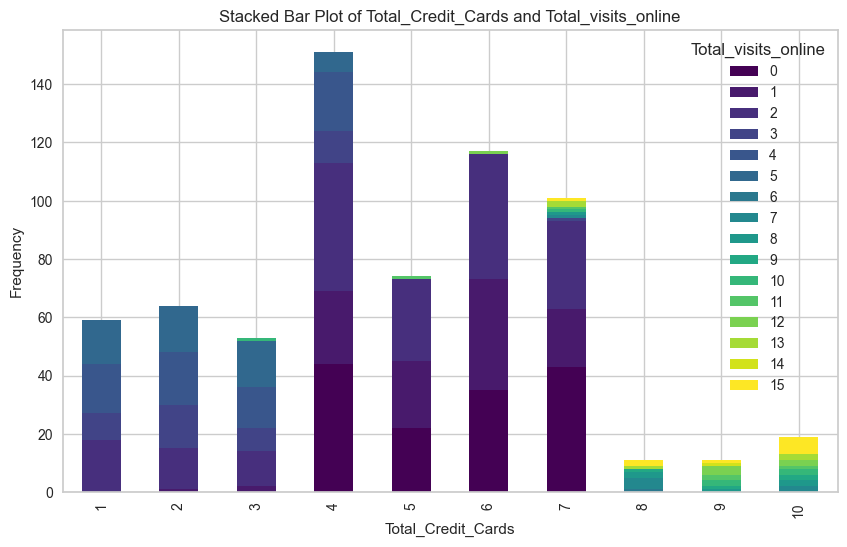

In [36]:
stacked_barplot(data,"Total_Credit_Cards","Total_visits_online")

**Observation**

This plot may suggest that people with around 4 to 7 credit cards are more common, while those with higher numbers of credit cards (like 9 or 10) tend to visit online platforms more frequently.

## Multivariant Analysis

**Let's check for correlations.**

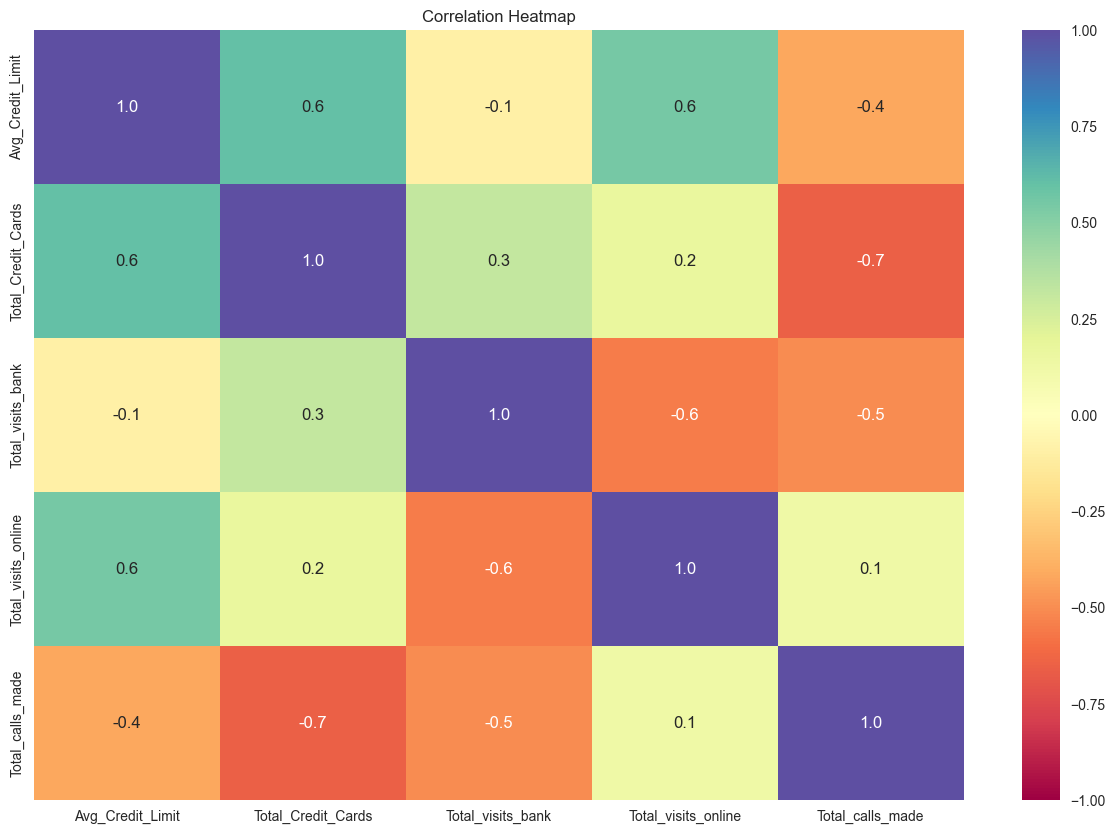

In [37]:
plt.figure(figsize=(15, 10))
sns.heatmap(
    num_col.corr(),
    annot=True,
    vmin=-1,
    vmax=1,
    fmt=".1f",
    cmap="Spectral"
)
plt.title("Correlation Heatmap")
plt.show()

**Observation**

Avg_Credit_Limit vs Total_Credit_Cards:

There is a moderately strong positive correlation (0.6), indicating that individuals with more credit cards tend to have higher average credit limits.
Total_Calls_Made vs Total_Credit_Cards:

A strong negative correlation (-0.7) suggests that individuals with more credit cards tend to make fewer calls, possibly indicating that they rely less on phone-based customer service.
Total_Visits_Online vs Avg_Credit_Limit:

There is a moderately positive correlation (0.6), meaning that higher online visits are associated with a higher average credit limit.
Total_Visits_Bank vs Total_Visits_Online:

A moderate negative correlation (-0.6) exists, suggesting that those who visit the bank more tend to visit online less, indicating a preference for in-person interaction for certain individuals.
Total_Visits_Bank vs Total_Calls_Made:

There is a moderate negative correlation (-0.5), which indicates that individuals who visit the bank more often make fewer phone calls.
Total_Calls_Made vs Avg_Credit_Limit:

A moderately negative correlation (-0.4) suggests that individuals with higher credit limits tend to make fewer calls.

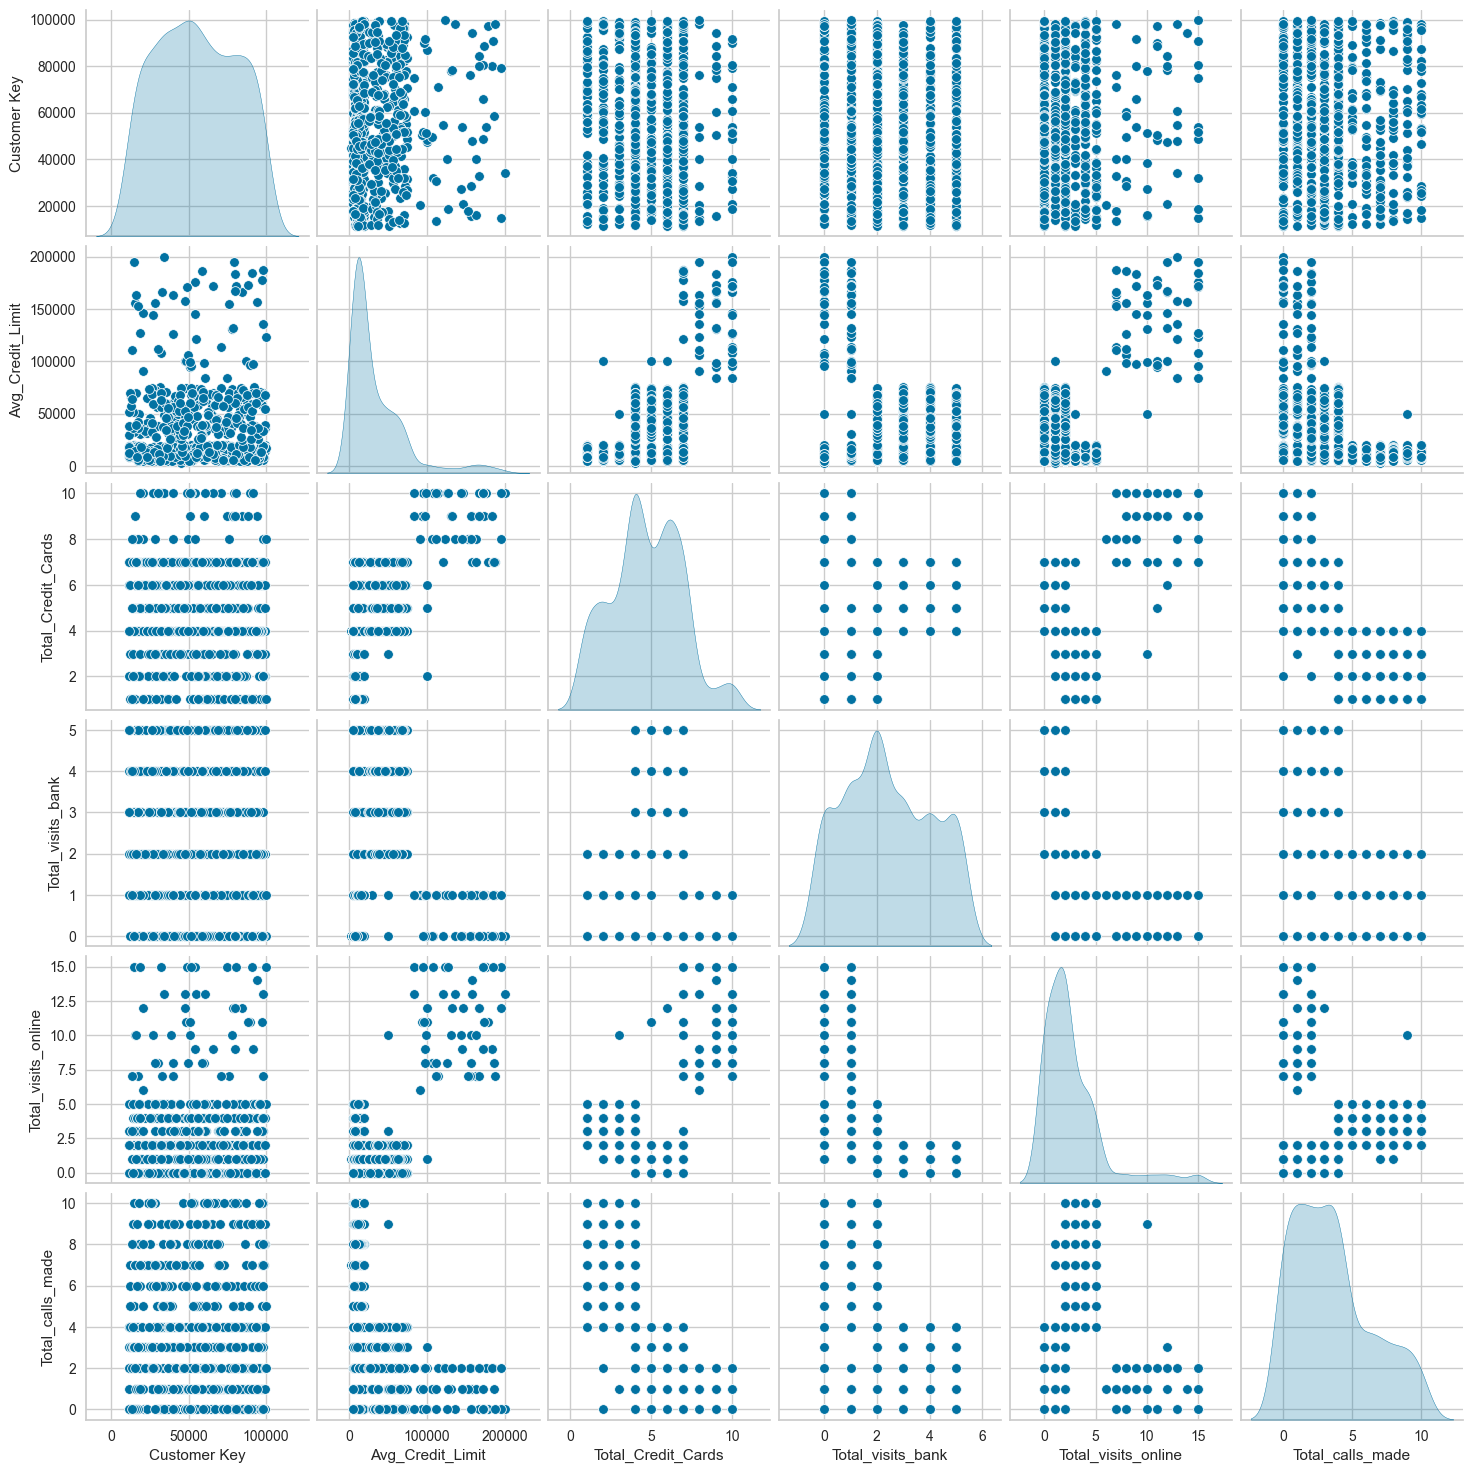

In [38]:
sns.pairplot(data=df, diag_kind="kde")
plt.show()

**Observations**

Avg_Credit_Limit vs Total_Credit_Cards:

A positive relationship is visible, confirming the earlier observation that higher numbers of credit cards tend to be associated with higher credit limits.
Total_Visits_Online vs Avg_Credit_Limit:

Weak positive relationship: customers with higher credit limits tend to make more online visits, though this is not a strong pattern.
Total_Calls_Made vs Total_Credit_Cards:

A clear negative trend is visible: as the number of credit cards increases, the number of calls made tends to decrease.
Total_Visits_Bank vs Total_Visits_Online:

A slight negative trend, showing that those who visit the bank frequently tend to make fewer online visits, further supporting the hypothesis that customers have a preference for either in-person or online interactions.
Diagonal Distribution:
The histograms along the diagonal show the distribution of each variable. Most variables, such as Avg_Credit_Limit, Total_Visits_Online, and Total_Calls_Made, are skewed, suggesting that there are some customers with much higher values compared to the majority.


## Data Preprocessing

### Missing Value Treatment

In [39]:
df.isna().sum()

Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

* There are no missing values in the dataset.

### Detecting Outliers

In [40]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = num_col.quantile(0.25)
Q3 = num_col.quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_iqr = ((num_col < lower_bound) | (num_col > upper_bound)).any(axis=1)

# Get outliers
outliers_iqr_df = num_col[outliers_iqr]

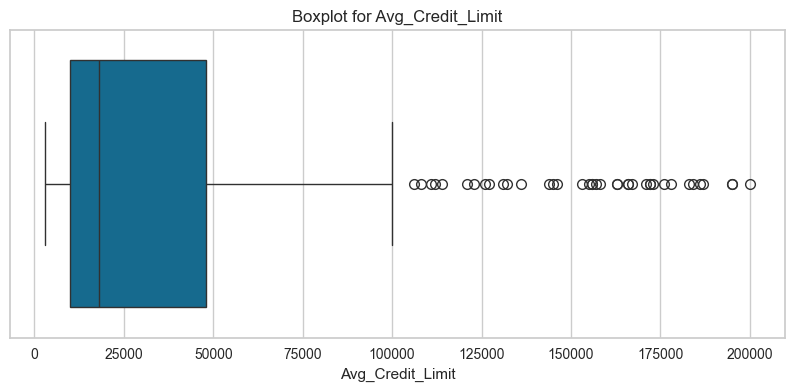

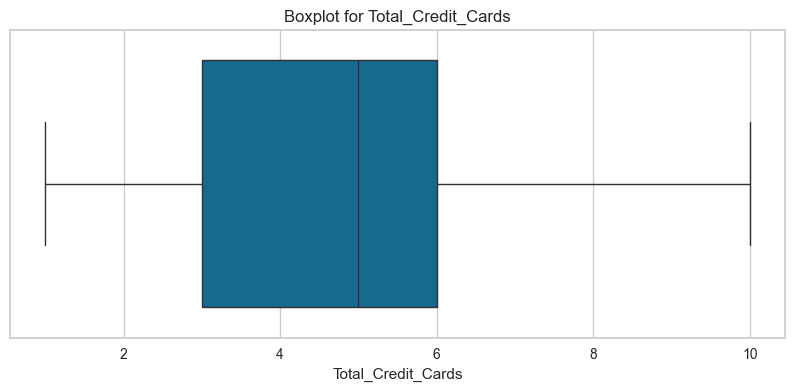

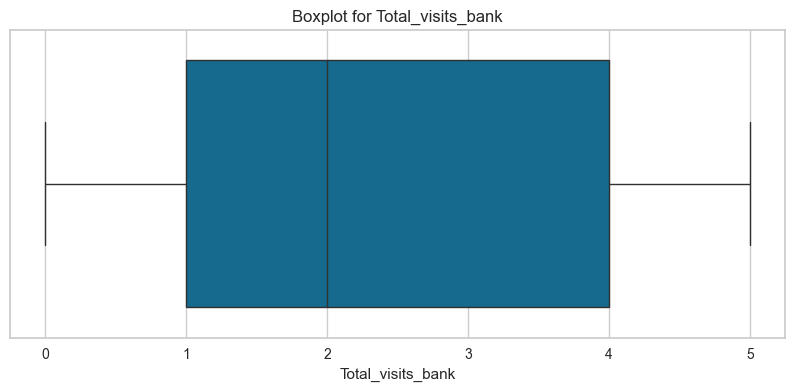

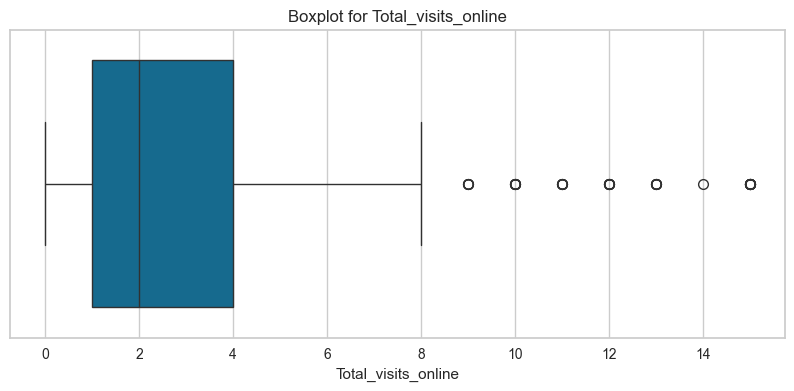

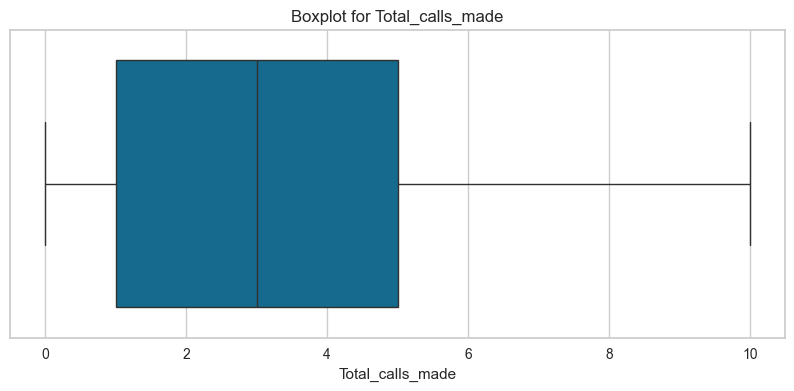

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot a boxplot for each numeric column
for col in num_col:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}')
    plt.show()


- Outliers are there but as they are actual values, we will not treat them and leave them in the dataset.

### Data Scaling

- Let's scale the data before we proceed with clustering.

In [42]:
# Create a copy of the dataframe with selected columns
df_scaled = num_col.copy()

# Initialize the scaler
scaler = StandardScaler()

# Scale the data
df_scaled.iloc[:, :] = scaler.fit_transform(df_scaled.iloc[:, :])

# Display the first few rows of the scaled data
df_scaled.head()


,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,1.740187,0.597334,-1.473731,3.202298,-0.203739


`Negative Values:`
-  These indicate that the observation is below the mean for that feature, given that standardization typically centers data around zero.
-  For instance, in Row 0, all values are negative, meaning that this individual has lower-than-average values across these features.

`Positive Values:`
- These values indicate the observation is above the mean.
- For instance, Row 1 has positive values for online visits and calls made, which could mean this customer interacts more frequently online and via phone than the average customer.
  
* Comparison of Features: Higher positive values suggest a greater deviation above the mean. For example, Row 1 has a large positive value in Total_visits_online (2.520519), suggesting that this customer has an unusually high number of online visits compared to the mean.

`Interpretability:`
- While the exact values are abstracted by scaling, the direction (positive or negative) helps understand how each observation relates to the average behavior.
- Impact on Modeling: Scaled data is typically beneficial for models that rely on distance calculations (like K-Means clustering or SVM), as it ensures each feature contributes comparably regardless of the original scale.

In [43]:
# creating dataframe copies for k-means and hierarchical clustering
km_df = df.copy()
hc_df = df.copy()

# **Model Building**

## K-means Clustering

### Checking Elbow Plot

Number of Clusters: 2 	Average Distortion: 1.4571553548514269
Number of Clusters: 3 	Average Distortion: 1.1466276549150365
Number of Clusters: 4 	Average Distortion: 1.0463825294774465
Number of Clusters: 5 	Average Distortion: 0.9908683849620168
Number of Clusters: 6 	Average Distortion: 0.9426543606899347
Number of Clusters: 7 	Average Distortion: 0.9093991915419353
Number of Clusters: 8 	Average Distortion: 0.8843243844476886
Number of Clusters: 9 	Average Distortion: 0.8650832420580971
Number of Clusters: 10 	Average Distortion: 0.8411372125672628


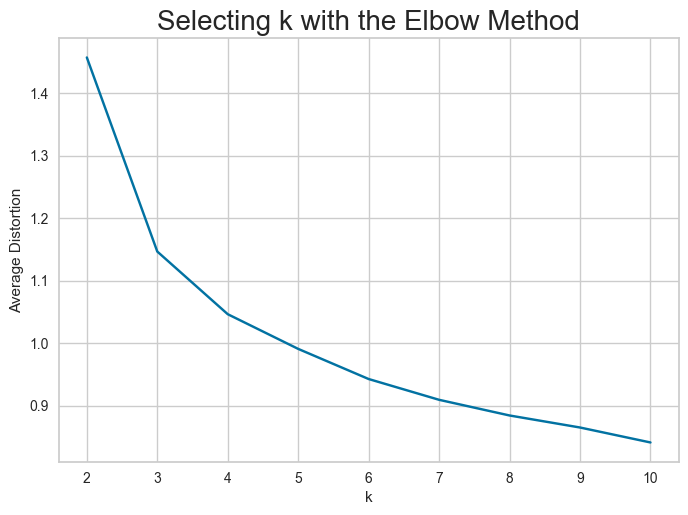

In [44]:
clusters = range(2, 11)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k, random_state=1)
    model.fit(df_scaled)
    prediction = model.predict(df_scaled)
    distortion = (
        sum(np.min(cdist(df_scaled, model.cluster_centers_, "euclidean"), axis=1))
        / df_scaled.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)
plt.show()

**Observations**

* The distortion reduction significantly decreases after 4 or 5 clusters.
* At 5 clusters, the average distortion is 0.9908, and additional clusters lead to smaller improvements, suggesting that 5 clusters may be a good balance between simplicity and compact clustering.
* In this graph, the elbow appears at k = 3, which suggests that 3 clusters might be the optimal choice for your data.

**Let's do further analysis to determine the optimal value of k**

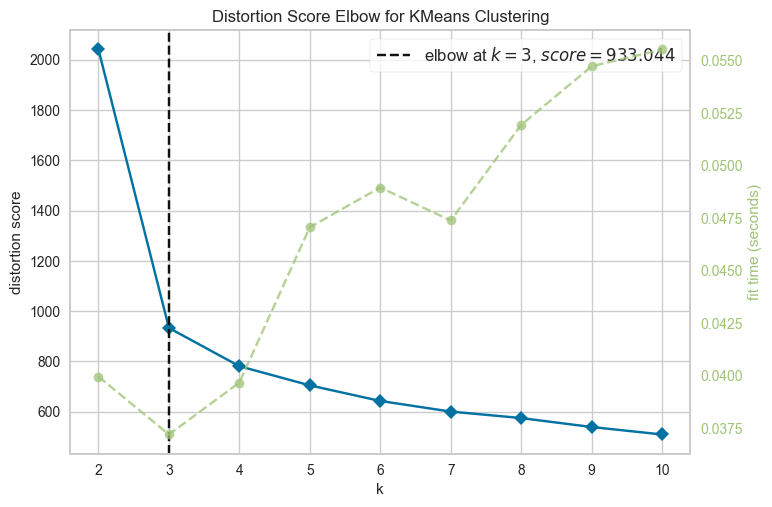

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [45]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2, 11), timings=True)
visualizer.fit(df_scaled)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

* The vertical black dashed line highlights the elbow point at k=3 with a distortion score of 933.044. This confirms that 3 clusters is the optimal number of clusters based on this analysis, as increasing k further yields diminishing returns in improving the clustering performance.

### Checking Silhouette Scores

**Let's check the silhouette scores.**

For n_clusters = 2, the silhouette score is 0.41842496663215445)
For n_clusters = 3, the silhouette score is 0.5157182558881063)
For n_clusters = 4, the silhouette score is 0.3556670619372605)
For n_clusters = 5, the silhouette score is 0.2717470361089752)
For n_clusters = 6, the silhouette score is 0.255906765297388)
For n_clusters = 7, the silhouette score is 0.24798644656011146)
For n_clusters = 8, the silhouette score is 0.2414240144760896)
For n_clusters = 9, the silhouette score is 0.2184645050755029)
For n_clusters = 10, the silhouette score is 0.21406586730833518)


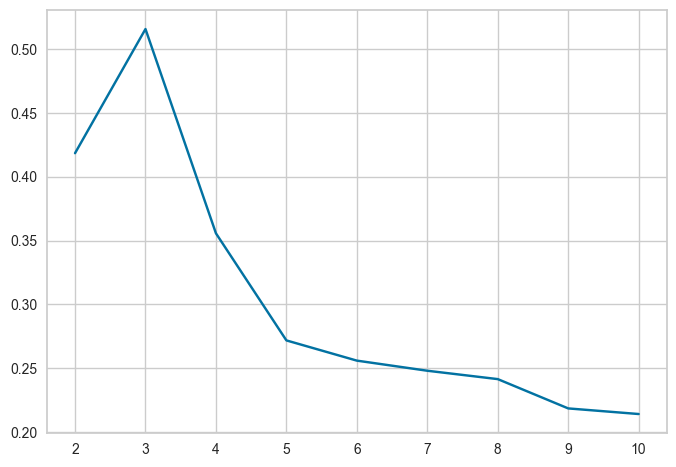

In [46]:
sil_score = []
cluster_list = range(2, 11)
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    preds = clusterer.fit_predict((df_scaled))
    score = silhouette_score(df_scaled, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

plt.plot(cluster_list, sil_score)
plt.show()

**Observation**

`Peak Score for 3 Clusters:`
- The silhouette score is highest at 0.5157 when n_clusters=3, indicating that clustering into 3 groups provides the best separation among clusters, meaning data points are more cohesive and well-separated from other clusters.
  
`Score Declines with More Clusters:`
- After n_clusters=3, the silhouette score decreases consistently. This suggests that additional clusters start creating less distinct and more overlapping groupings, possibly leading to over-segmentation.

**Based on silhouette scores, 3 clusters would be ideal, as it gives the highest silhouette score, indicating well-defined and distinct clusters.**

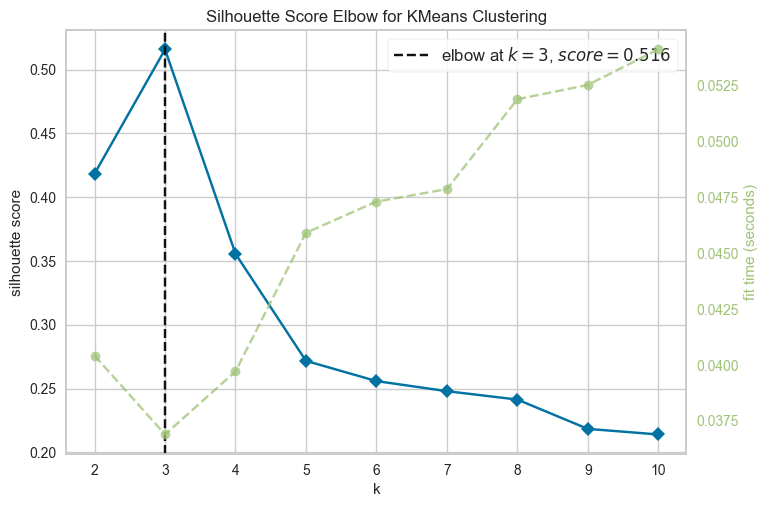

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [47]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2, 11), metric="silhouette", timings=True)
visualizer.fit(df_scaled)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

**From the silhouette scores, it seems that 3 is a good value for k.**

**Silhouette Plot**

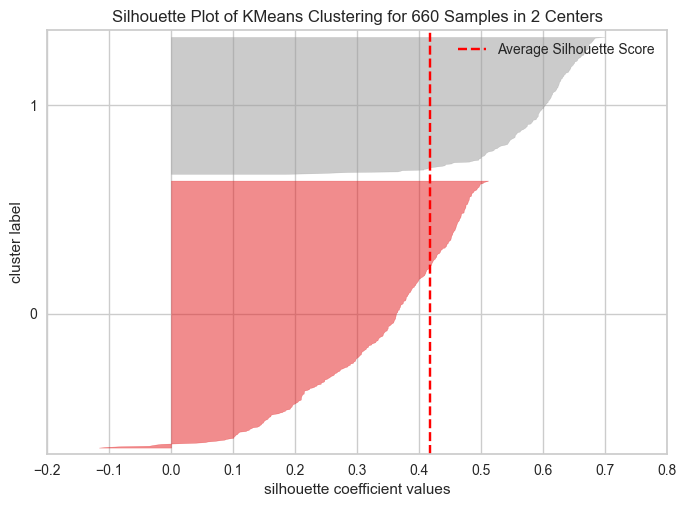

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 660 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [48]:
# Finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(2, random_state=1))
visualizer.fit(df_scaled)
visualizer.show()

- The silhouette plot provides insights into the quality of clustering. In this case, the average silhouette score of 0.4 suggests that there is moderate separation between the clusters. However, the presence of negative silhouette values indicates that some data points may not be well separated, possibly due to overlap between clusters.
- This plot suggests that a deeper evaluation of the data's structure may be necessary to determine if 2 clusters are the optimal choice or if a higher number of clusters would better separate the data.

It indicates that while the model has found two distinct customer segments, some overlap or misclassification may exist, requiring further refinement.

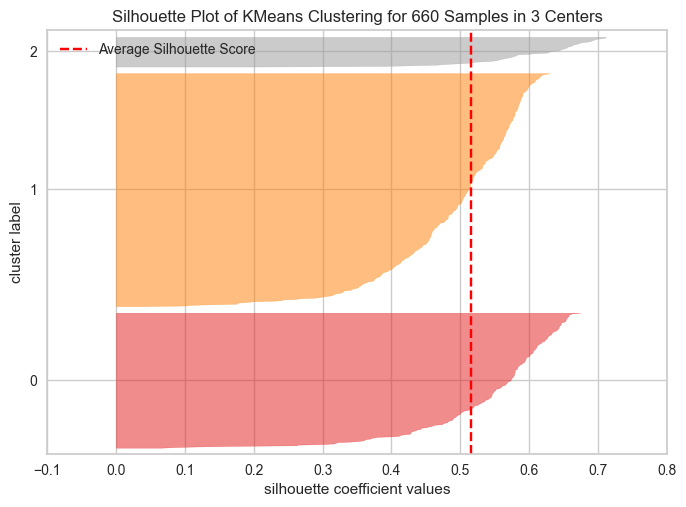

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 660 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [49]:
# Finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))
visualizer.fit(df_scaled)
visualizer.show()

- The average silhouette score has improved, suggesting that clustering into 3 centers offers better-defined clusters compared to 2 centers.
- The negative and near-zero silhouette values indicate that some points are close to the decision boundary or possibly misclustered, but overall the clustering structure appears to be reasonably good.

It indicates that while the model has found two distinct customer segments, some overlap or misclassification may exist, requiring further refinement.

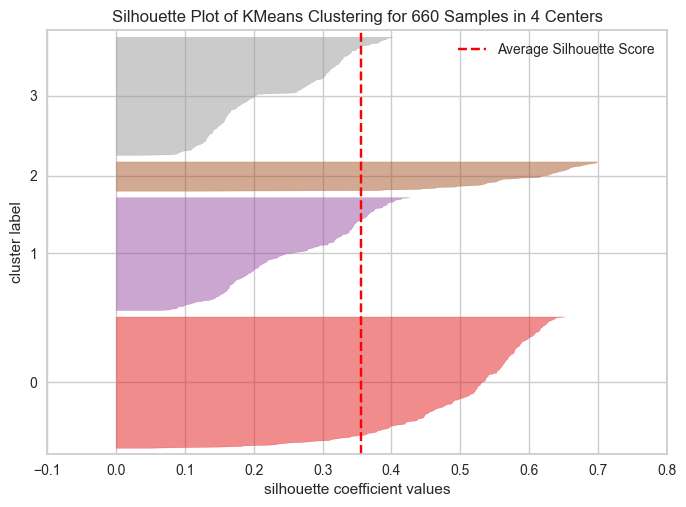

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 660 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [50]:
# Finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(df_scaled)
visualizer.show()

Overall, the silhouette scores indicate that the clustering is generally good, but there may be some room for improvement, especially in certain clusters.

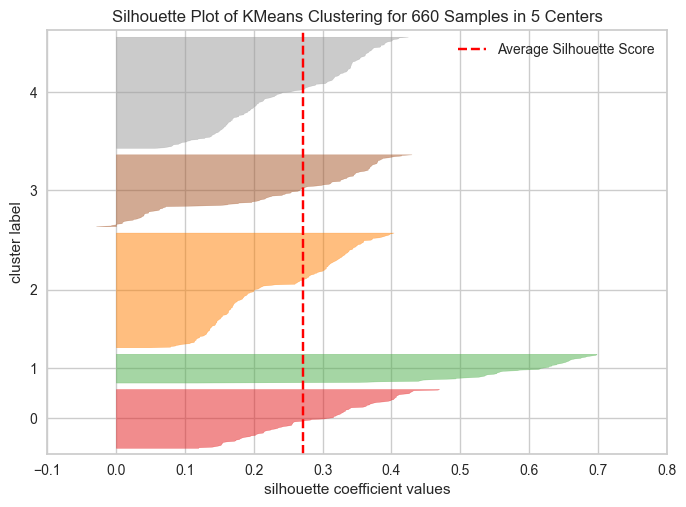

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 660 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [51]:
# Finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(5, random_state=1))
visualizer.fit(df_scaled)
visualizer.show()

This suggests that while the dataset can be divided into 5 clusters, the separation between them may not be as strong as with 4 clusters. The additional cluster could be causing more points to fall near the boundaries between clusters, reducing the overall silhouette score.

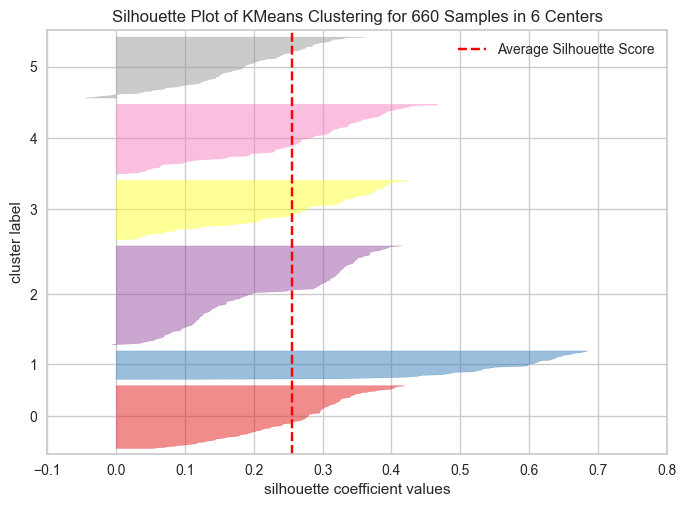

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 660 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [52]:
# Finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(6, random_state=1))
visualizer.fit(df_scaled)
visualizer.show()

Overall, increasing the number of clusters to 6 seems to degrade the quality of clustering, as evidenced by the lower silhouette scores and more ambiguous cluster boundaries. This suggests that fewer clusters (such as 4 or 5) might provide a better fit for this dataset.

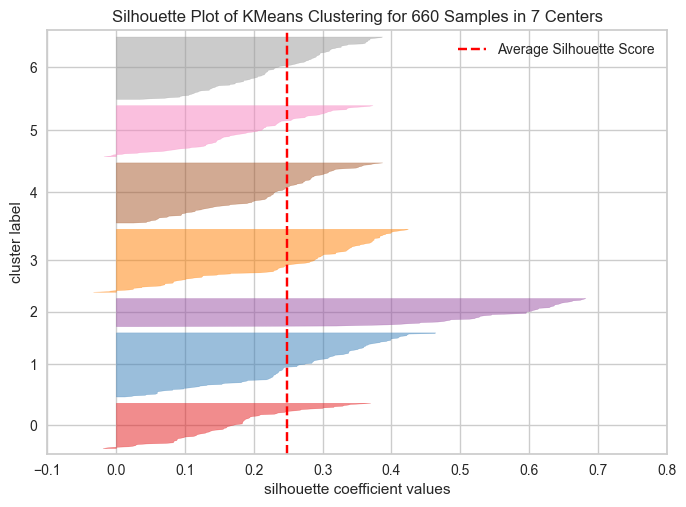

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 660 Samples in 7 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [53]:
# Finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(7, random_state=1))
visualizer.fit(df_scaled)
visualizer.show()

**We will proceed with k=3**

### Creating Final Model

In [54]:
kmeans = KMeans(n_clusters=3, random_state=1)
kmeans.fit(df_scaled)

KMeans(n_clusters=3, random_state=1)

In [55]:
# adding kmeans cluster labels to the original dataframe
km_df["KM_segments"] = kmeans.labels_

## Hierarchical Clustering

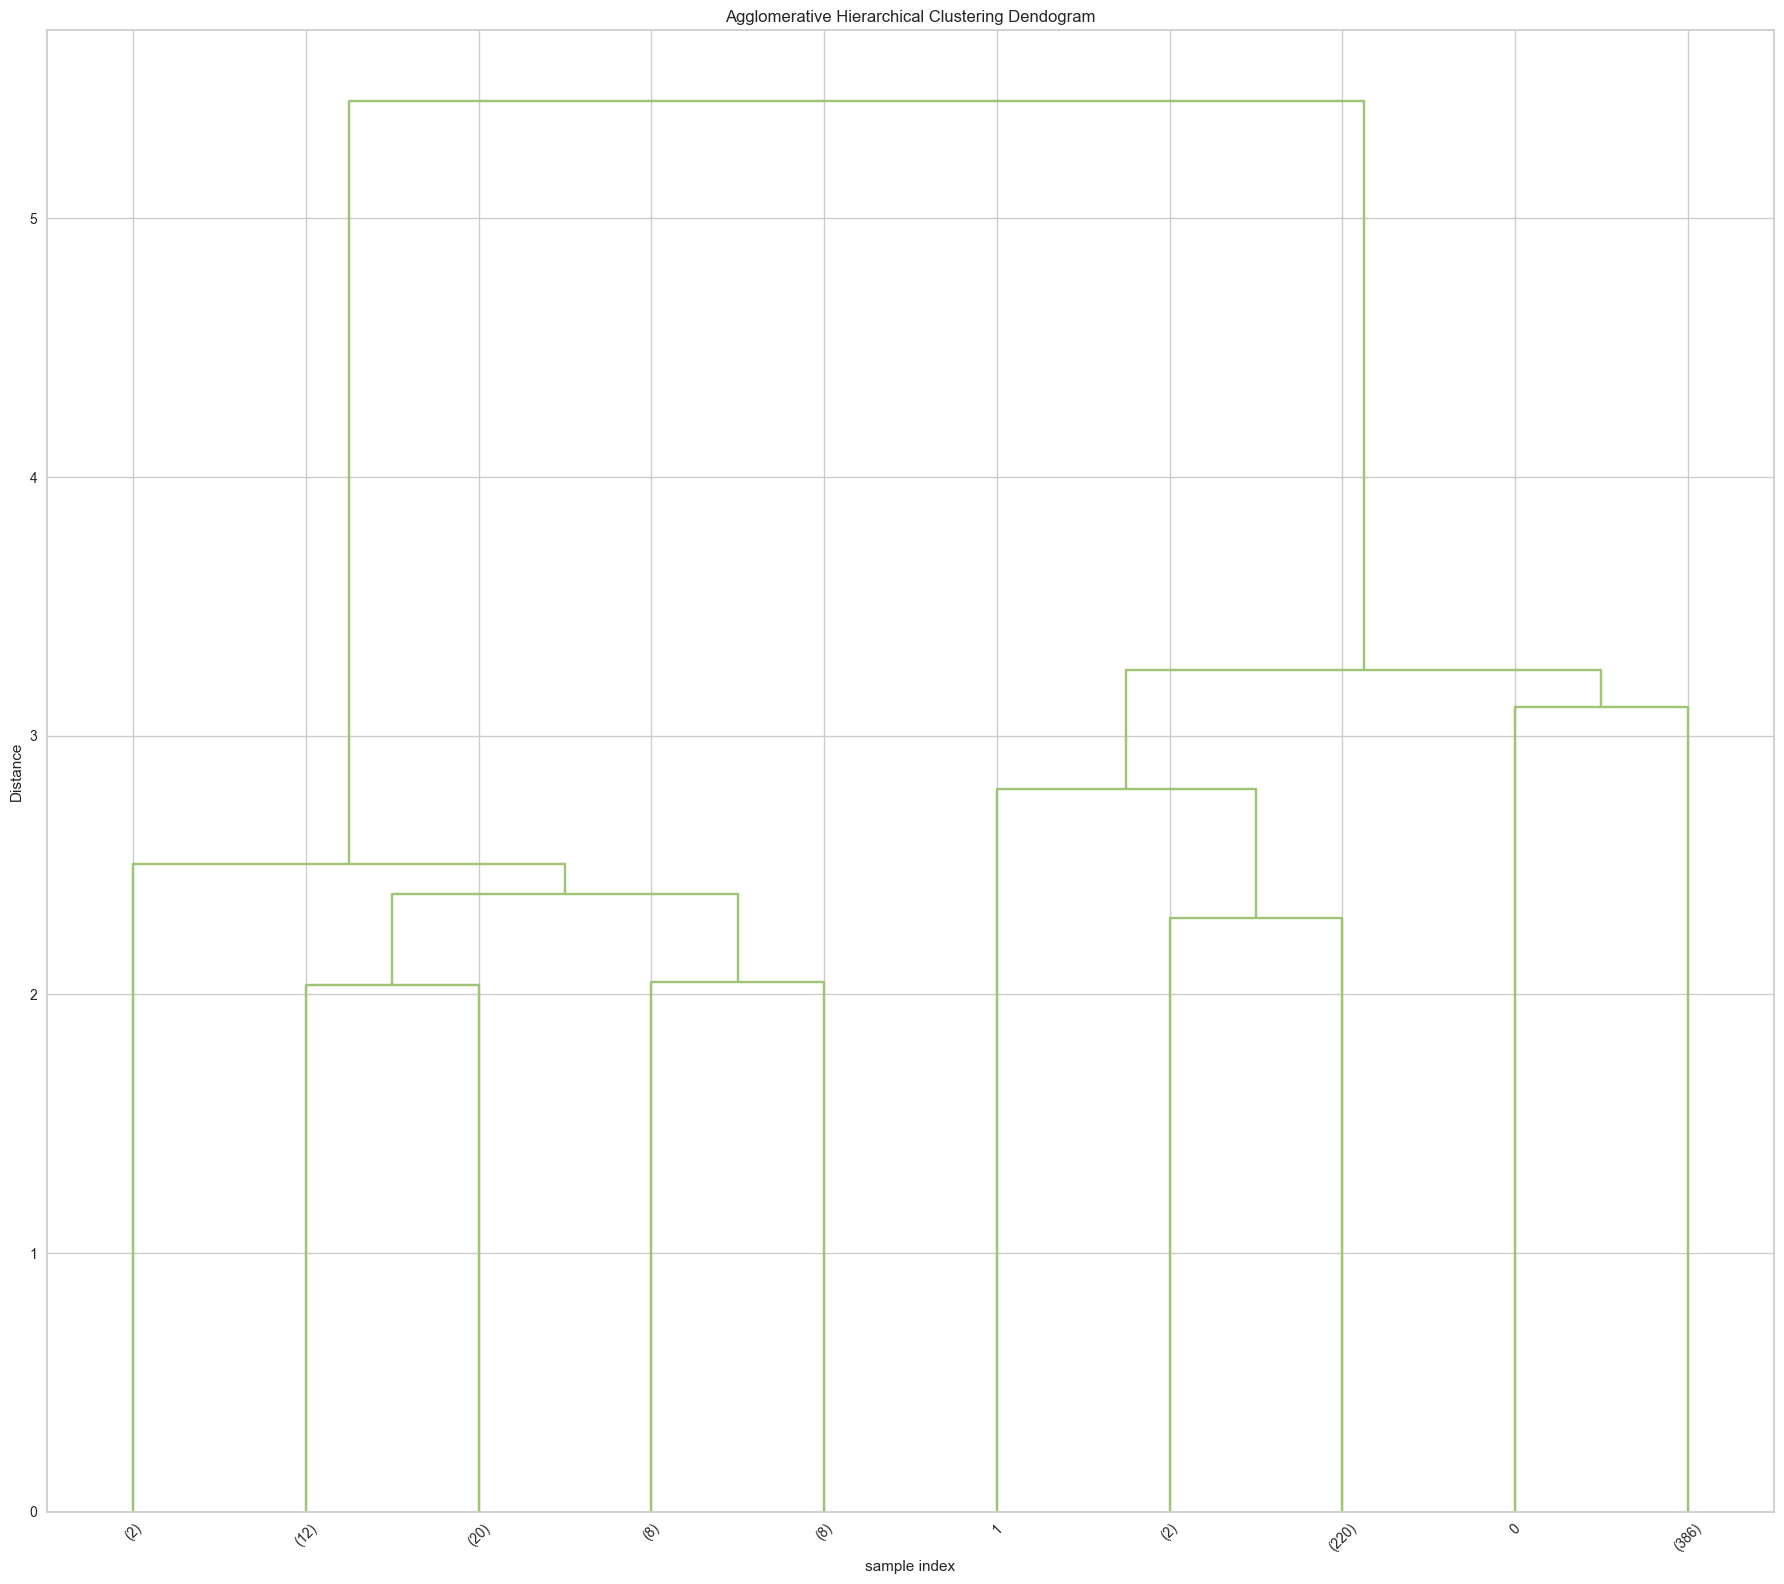

In [56]:
from sklearn.metrics.pairwise import euclidean_distances

df_scaled.shape
(186, 26)

plt.figure(figsize=(18, 16))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')

Z = linkage(df_scaled, 'average')
dendrogram(Z,
           leaf_rotation=45.0,
           p=10,
           color_threshold=12,
           leaf_font_size=10,
           truncate_mode='lastp') # level, lastp
plt.tight_layout()

* The branches that split at the top are more dissimilar than those splitting closer to the bottom.

In [57]:
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, cophenet

# Calculate the condensed distance matrix (1D array)
dist_array = pdist(df_scaled, metric='euclidean')

# Create the linkage matrix
Z = linkage(dist_array, method='ward')

# Calculate the cophenetic correlation coefficient
coeff, cophendet_dist = cophenet(Z, dist_array)

# Print the cophenetic correlation coefficient
print(coeff)
print(cophendet_dist)


0.7415156284827493
[50.16298666  6.4228412   6.81290874 ...  7.79653157  1.62874841
  7.79653157]


A coefficient value around 0.74, as in your output, suggests a moderate to strong correlation. In hierarchical clustering, a coefficient closer to 1 indicates that the clustering structure is a good fit for the original distances.
A value of 0.74 means that the clusters somewhat accurately represent the distances in the original data, though there might be some deviation.

### Computing Cophenetic Correlation

In [58]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(df_scaled, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(df_scaled))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.7391220243806552.
Cophenetic correlation for Euclidean distance and complete linkage is 0.8599730607972423.
Cophenetic correlation for Euclidean distance and average linkage is 0.8977080867389372.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8861746814895477.
Cophenetic correlation for Chebyshev distance and single linkage is 0.7382354769296767.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.8533474836336782.
Cophenetic correlation for Chebyshev distance and average linkage is 0.8974159511838106.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.8913624010768603.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.7058064784553605.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.5422791209801746.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.8326994115042134.
Cophenetic co

In [59]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.8977080867389372, which is obtained with Euclidean distance and average linkage.


* Average Linkage with Euclidean Distance (or Cityblock Distance) appears to be the best choice, given its high cophenetic correlation, suggesting a good balance between cluster fit and interpretability.

**Let's explore different linkage methods with Euclidean distance only.**

In [60]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(df_scaled, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(df_scaled))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.7391220243806552.
Cophenetic correlation for complete linkage is 0.8599730607972423.
Cophenetic correlation for average linkage is 0.8977080867389372.
Cophenetic correlation for centroid linkage is 0.8939385846326323.
Cophenetic correlation for ward linkage is 0.7415156284827493.
Cophenetic correlation for weighted linkage is 0.8861746814895477.


In [61]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.8977080867389372, which is obtained with average linkage.


**We see that the cophenetic correlation is maximum with Euclidean distance and average linkage.**

### Checking Dendrograms

**We see that the cophenetic correlation is maximum with Euclidean distance and average linkage.**


**Let's view the dendrograms for the different linkage methods.**

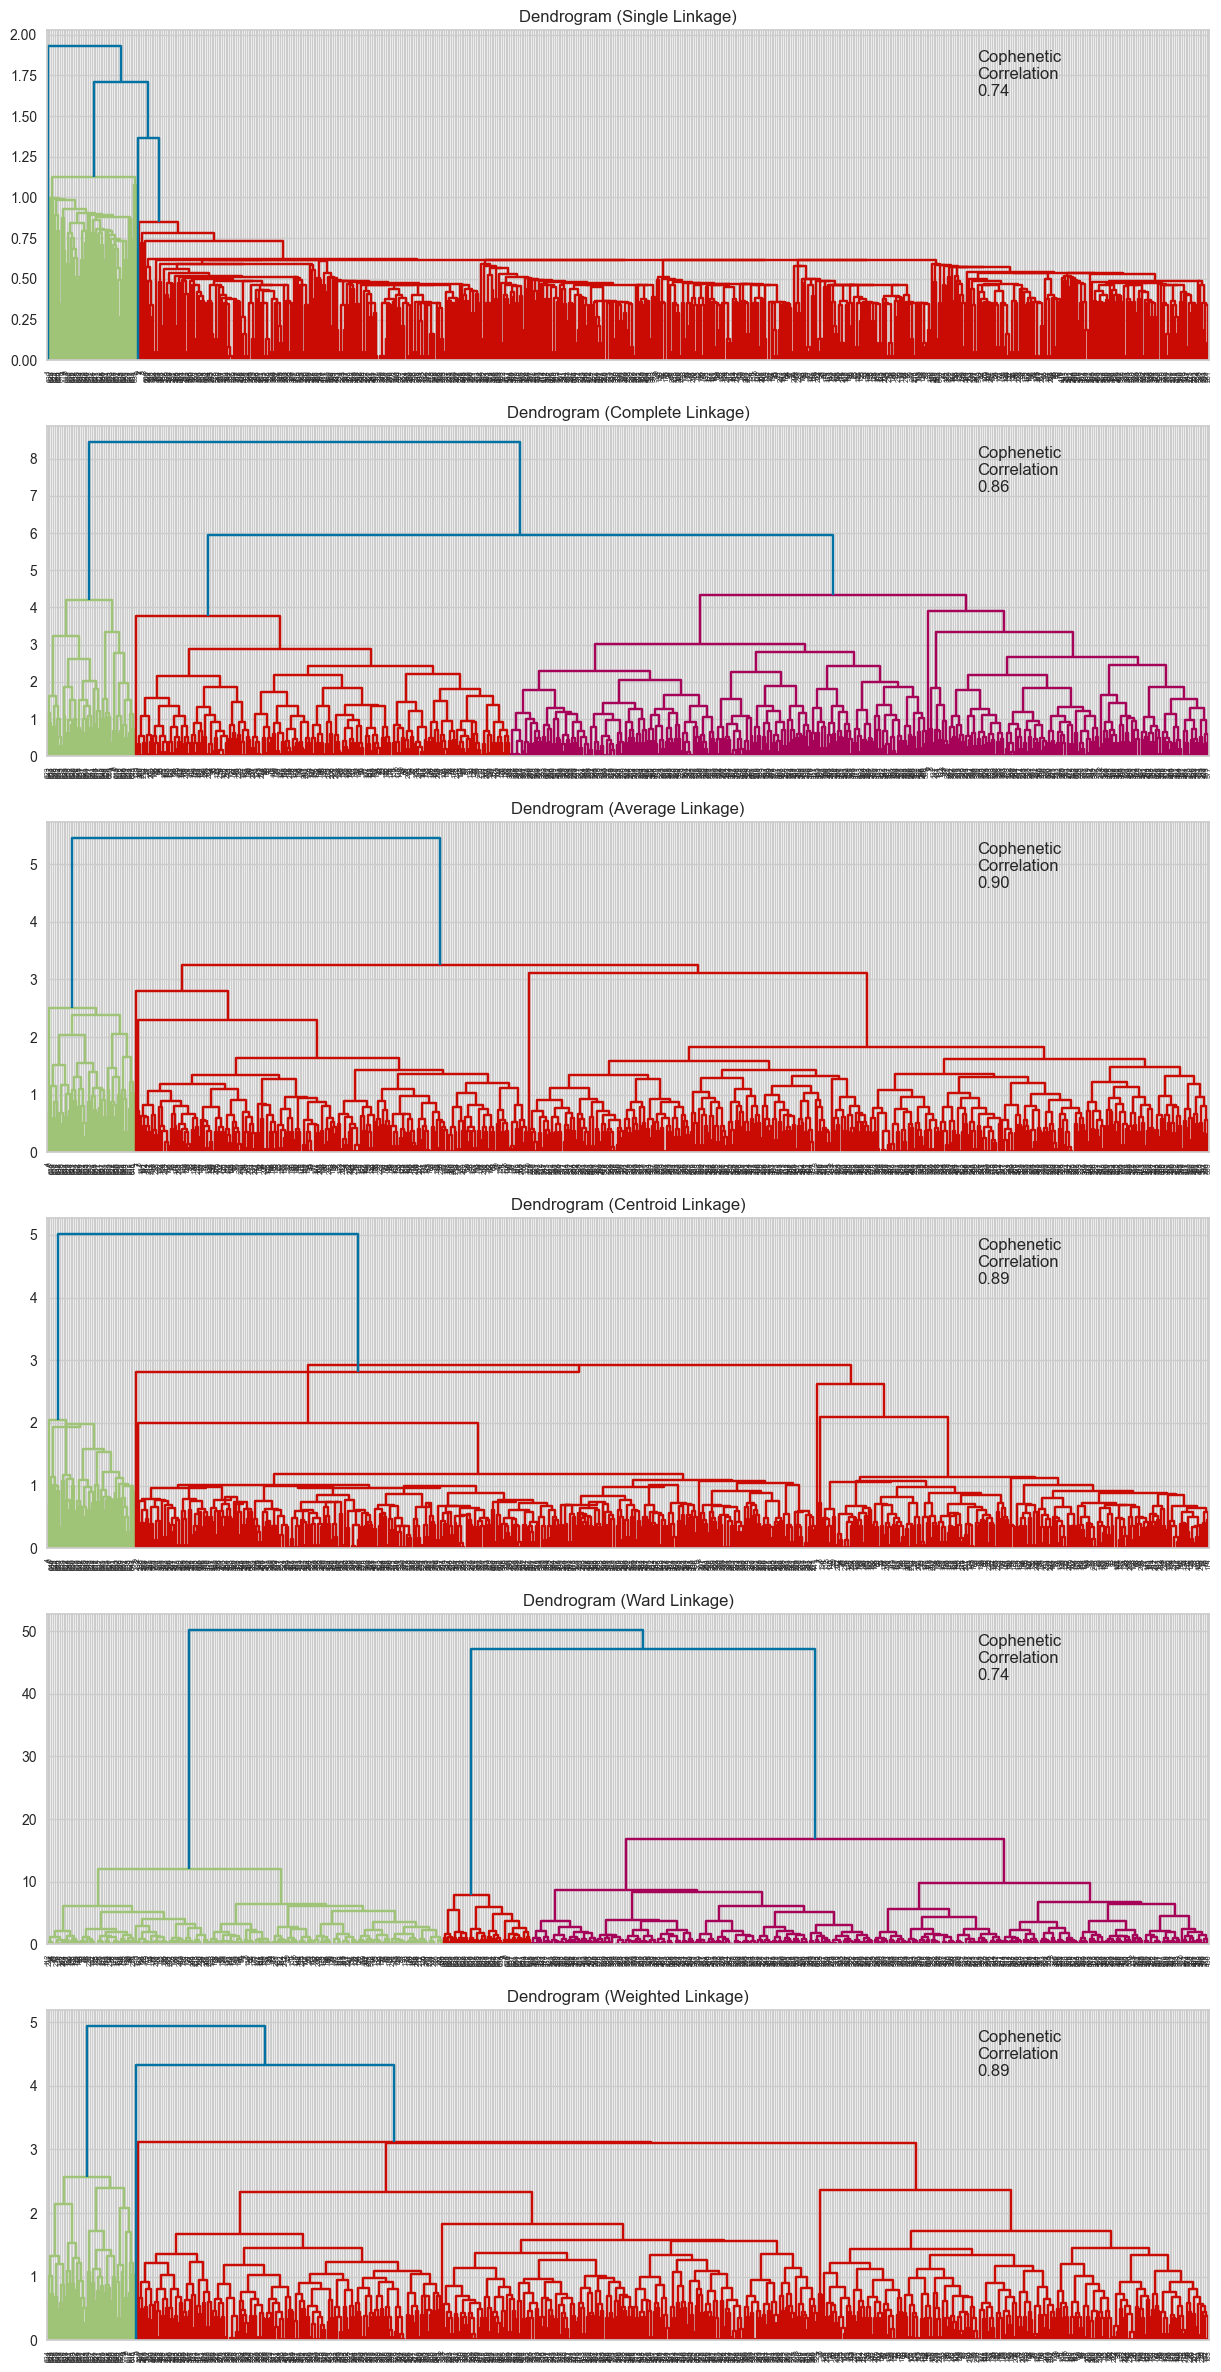

In [62]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(df_scaled, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(df_scaled))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

    compare.append([method, coph_corr])

**Observations**

- Looking the the above dendrograms, the Ward linkage seems to result in the best separation between clusters, even though its cophenetic correlation is lower than the other linkages.
- 3 looks to be a good choice for no. of clusters.

### Creating Final Model

In [63]:
hc = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="ward")
hc_labels_ = hc.fit_predict(df_scaled)# adding Hierarchical Clustering labels to the original dataframe

In [64]:
hc_df["HC_segments"] = hc_labels_

# **Cluster Profiling and Comparison**

## Cluster Profiling: K-means Clustering

In [65]:
# Step 1: Create a cluster_profile DataFrame with 'KM_segments' and the columns in 'num_col'
num_col = ['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']
# First, ensure 'KM_segments' is included
cluster_profile = km_df[['KM_segments'] + num_col].groupby("KM_segments").mean().reset_index()

# Step 2: Group by 'KM_segments' and calculate the count of 'Total_Credit_Cards'
count_in_segments = km_df.groupby("KM_segments")["Total_Credit_Cards"].count().reset_index()

# Step 3: Rename the count column for clarity
count_in_segments = count_in_segments.rename(columns={"Total_Credit_Cards": "count_in_each_segments"})

# Step 4: Merge the count data into the cluster_profile DataFrame
cluster_profile = cluster_profile.merge(count_in_segments, on="KM_segments", how="left")

# Now 'cluster_profile' contains the profile without 'Customer_Key'
print(cluster_profile)


   KM_segments  Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0            0      12174.107143            2.410714           0.933036   
1            1      33782.383420            5.515544           3.489637   
2            2     141040.000000            8.740000           0.600000   

   Total_visits_online  Total_calls_made  count_in_each_segments  
0             3.553571          6.870536                     224  
1             0.981865          2.000000                     386  
2            10.900000          1.080000                      50  


In [66]:
clusters = km_df.KM_segments.unique().tolist()
for cl in clusters:
    print(
        "The",
        km_df[km_df["KM_segments"] == cl]["Total_Credit_Cards"].nunique(),
        "Total credit cards",
        cl,
        "are:",
    )
    print(km_df[km_df["KM_segments"] == cl]["Total_Credit_Cards"].unique())
    print("-" * 100, "\n")

The 5 Total credit cards 1 are:
[2 7 5 4 6]
---------------------------------------------------------------------------------------------------- 

The 4 Total credit cards 0 are:
[3 2 4 1]
---------------------------------------------------------------------------------------------------- 

The 6 Total credit cards 2 are:
[ 6  5  9  8 10  7]
---------------------------------------------------------------------------------------------------- 



In [67]:
# let's display cluster profiles
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,KM_segments,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segments
0,0,12174.107143,2.410714,0.933036,3.553571,6.870536,224
1,1,33782.383420,5.515544,3.489637,0.981865,2.000000,386
2,2,141040.000000,8.740000,0.600000,10.900000,1.080000,50


**Observation**

- segment 2 consists of high-value customers who are comfortable with online banking and managing multiple credit cards. They are likely to seek premium offerings that match their lifestyle.

In [68]:
# let's plot the attributes of only the big clusters
c1 = [0, 1, 2]
km_df2 = km_df[km_df.KM_segments.isin(c1)]

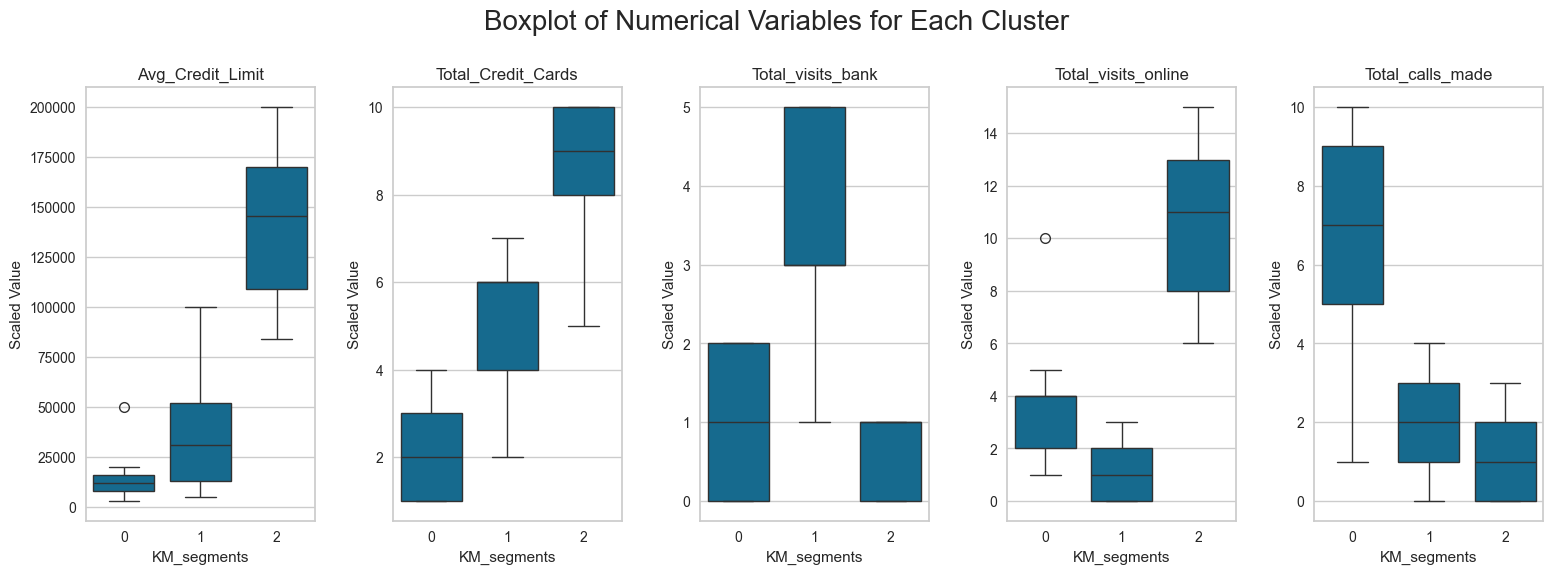

In [69]:
# Create the subplots
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of Numerical Variables for Each Cluster", fontsize=20)

# Loop to create boxplots for each variable in num_col
for counter, var in enumerate(num_col[:5]):  # Loop over the first 5 variables in num_col
    sns.boxplot(
        ax=axes[counter],
        y=km_df[var],  # Use the variable from num_col
        x=km_df["KM_segments"],
    )
    axes[counter].set_title(var)  # Set the title for each subplot
    axes[counter].set_ylabel("Scaled Value")  # Set y-label for clarity

# Adjust layout
fig.tight_layout(pad=2.0)
plt.subplots_adjust(top=0.85)  # Adjust to fit the suptitle
plt.show()  # Show the plot

Avg_Credit_Limit:

Segment 2 has the highest average credit limit, with a median close to 175,000, and a wide interquartile range (IQR).
Segment 1 has a moderate average credit limit, with a median around 75,000.
Segment 0 has the lowest average credit limit, with a median below 25,000, and some outliers below the lower whisker.
Total_Credit_Cards:

Segment 2 has the highest number of credit cards, with a median around 9.
Segment 1 is in the middle, with a median around 6.
Segment 0 has the fewest credit cards, with a median of about 3, and a narrower IQR.
Total_visits_bank:

Segment 1 has the most bank visits, with a median around 4, and the widest IQR, indicating more variability.
Segment 0 has fewer bank visits, with a median of about 2.
Segment 2 has the least bank visits, with a median around 1.
Total_visits_online:

Segment 2 has the highest number of online visits, with a median around 12.
Segment 1 is moderate in online visits, with a median around 4.
Segment 0 has the fewest online visits, with a median around 2, and some outliers.
Total_calls_made:

Segment 0 has the most calls made, with a median close to 8, and the widest range.
Segment 1 has fewer calls, with a median around 3.
Segment 2 has the fewest calls, with a median around 2.
Overall Insights:
Segment 2 seems to have higher financial limits and more online activity (credit limit, credit cards, online visits) but fewer physical interactions (bank visits, calls).
Segment 1 balances moderate financial activity and bank visits.
Segment 0 is characterized by lower financial activity (credit limit, credit cards, online visits) but more physical interactions, particularly in calls made.

### Insights

#### Cluster 0 
This segment may require additional support and education regarding credit management and the benefits of using multiple credit products. There is potential for growth in credit card usage if the bank addresses their concerns and hesitations.

#### Cluster 1

Customers in this segment value in-person interactions and may not fully leverage digital banking opportunities. They represent a balance between traditional banking and modern credit management.

#### Cluster 2

This segment consists of high-value customers who are comfortable with online banking and managing multiple credit cards. They are likely to seek premium offerings that match their lifestyle.

## Cluster Profiling: Hierarchical Clustering

In [70]:
hc_df = hc_df.drop(columns=['Customer Key'])

In [71]:
# Create cluster profile DataFrame
cluster_profile_hierarchical = hc_df.groupby('HC_segments').mean().reset_index()

# Count of records in each cluster
cluster_counts = hc_df['HC_segments'].value_counts().reset_index()
cluster_counts.columns = ['HC_segments', 'Count']

# Merge counts into the profile DataFrame
cluster_profile_hierarchical = cluster_profile_hierarchical.merge(cluster_counts, on='HC_segments')

# Rename columns for clarity
cluster_profile_hierarchical.rename(columns={"HC_segments": "Cluster"}, inplace=True)

# Display the cluster profile
print(cluster_profile_hierarchical)

   Cluster  Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0        0      33851.948052            5.516883           3.493506   
1        1      12151.111111            2.422222           0.937778   
2        2     141040.000000            8.740000           0.600000   

   Total_visits_online  Total_calls_made  Count  
0             0.979221          1.994805    385  
1             3.546667          6.857778    225  
2            10.900000          1.080000     50  


In [72]:
clusters = hc_df.HC_segments.unique().tolist()
for cl in clusters:
    print(
        "The",
        hc_df[hc_df["HC_segments"] == cl]["Total_Credit_Cards"].nunique(),
        "Total credit cards",
        cl,
        "are:",
    )
    print(hc_df[hc_df["HC_segments"] == cl]["Total_Credit_Cards"].unique())
    print("-" * 100, "\n")

The 5 Total credit cards 0 are:
[2 7 5 4 6]
---------------------------------------------------------------------------------------------------- 

The 5 Total credit cards 1 are:
[3 2 4 1 5]
---------------------------------------------------------------------------------------------------- 

The 6 Total credit cards 2 are:
[ 6  5  9  8 10  7]
---------------------------------------------------------------------------------------------------- 



* Cluster 0 and Cluster 2 customers are more likely to be actively exploring and managing multiple credit cards, while Cluster 1 customers exhibit a more cautious approach. Tailored strategies can be developed for each cluster to enhance customer engagement and maximize the utilization of credit products.

In [73]:
# displaying the group-wise means of variables
cluster_profile_hierarchical.style.highlight_max(color="lightgreen", axis=0)

,Cluster,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Count
0,0,33851.948052,5.516883,3.493506,0.979221,1.994805,385
1,1,12151.111111,2.422222,0.937778,3.546667,6.857778,225
2,2,141040.000000,8.740000,0.600000,10.900000,1.080000,50


The analysis of each cluster highlights distinct patterns in customer behavior and preferences regarding credit usage and banking interactions. Cluster 0 customers demonstrate a balanced approach between in-person and online banking, while Cluster 1 customers lean towards digital services but require more support. Cluster 2 customers exhibit high engagement and confidence in online banking, representing opportunities for premium services and tailored financial products.

In [74]:
# let's plot the attributes of only the big clusters
c1 = [0, 1, 2]
hc_df2 = hc_df[hc_df.HC_segments.isin(c1)]

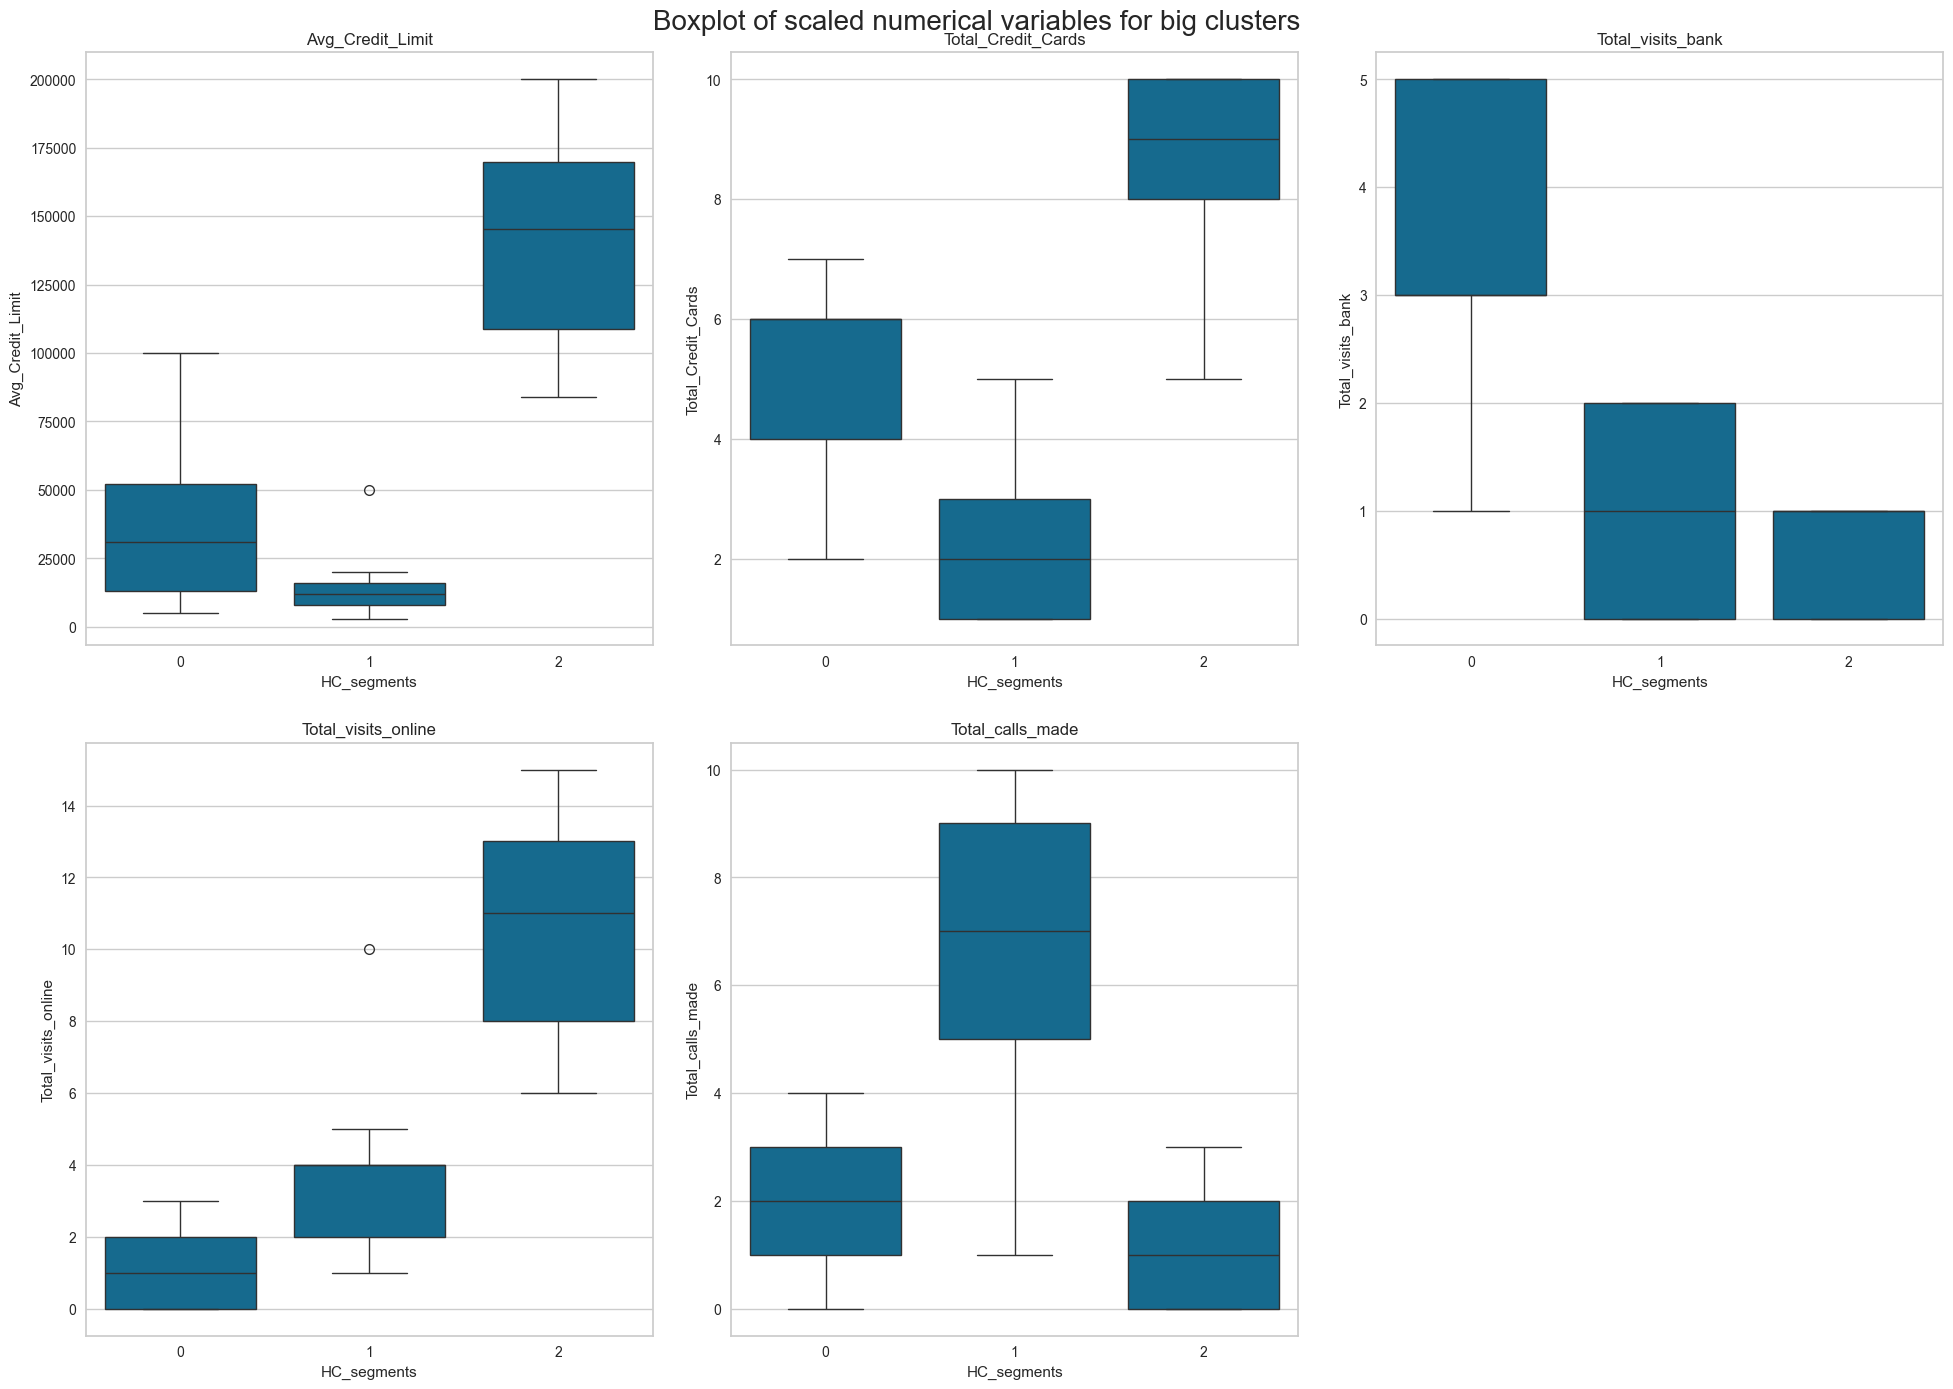

In [75]:
# Plot boxplots for only the selected clusters
plt.figure(figsize=(20, 35))
plt.suptitle("Boxplot of scaled numerical variables for big clusters", fontsize=20)

for i, variable in enumerate(num_col):
    plt.subplot(5, 3, i + 1)
    sns.boxplot(data=hc_df2, x="HC_segments", y=variable)  # Use filtered DataFrame
    plt.title(variable)

plt.tight_layout(pad=2.0)
plt.show()

Avg_Credit_Limit:

Segment 2 has a significantly higher average credit limit, with a median around 150,000.
Segment 0 has a much lower average credit limit, with a median below 50,000.
The interquartile range (IQR) is larger for segment 2, indicating more variability in the credit limits.
Total_Credit_Cards:

Segment 2 has more total credit cards, with a median around 8, compared to segment 0, whose median is around 5.
Segment 2 also shows a wider IQR, suggesting more variation in the number of credit cards.
Total_visits_bank:

Segment 0 has more visits to the bank, with a median close to 4.5.
Segment 2 has fewer bank visits, with a median near 1.
There is more variability in bank visits in segment 0 compared to segment 2.
Total_visits_online:

Segment 2 has significantly more online visits, with a median around 12, compared to segment 0, which has a median around 2.
The distribution for segment 2 shows a wider range, indicating higher variability in online visits.
Total_calls_made:

Segment 0 has more calls made, with a median of around 2.5, while segment 2 has fewer calls, with a median just below 2.
There is more variability in calls for segment 0.
Overall, it seems like Segment 2 tends to have higher financial activity (in terms of credit limit and online visits), while Segment 0 has more physical interactions (bank visits and calls) and lower financial activity. This could indicate different customer behavior patterns in the two segments.

### Insights

#### Cluster 0

This cluster consists of customers with a moderate average credit limit and a relatively high number of credit cards. The frequent bank visits indicate a preference for in-person banking, while the lower online visit frequency suggests potential opportunities for increasing digital engagement. Customers here seem to balance their interactions between traditional and online banking, and they might benefit from targeted marketing that highlights the advantages of online services.

#### Cluster 1

This cluster represents customers with the lowest average credit limit and the fewest credit cards. They exhibit a strong inclination toward online banking, suggesting a comfort with digital interactions. However, the high number of calls indicates they may require assistance with their accounts. There is an opportunity to enhance their financial literacy and confidence in using credit products, which could help them utilize more credit options effectively.

#### Cluster 2

This cluster consists of high-value customers with significant credit limits and a very high number of credit cards. They prefer online banking and exhibit minimal need for phone support, indicating confidence in managing their finances digitally. These customers are likely seeking premium services and exclusive benefits. Tailoring high-end financial products and digital experiences to this segment could foster loyalty and satisfaction.

## K-means vs Hierarchical Clustering

In [76]:
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,KM_segments,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segments
0,0,12174.107143,2.410714,0.933036,3.553571,6.870536,224
1,1,33782.383420,5.515544,3.489637,0.981865,2.000000,386
2,2,141040.000000,8.740000,0.600000,10.900000,1.080000,50


In [77]:
clusters = km_df.KM_segments.unique().tolist()
for cl in clusters:
    print(
        "The",
        km_df[km_df["KM_segments"] == cl]["Total_Credit_Cards"].nunique(),
        "Total credit cards",
        cl,
        "are:",
    )
    print(km_df[km_df["KM_segments"] == cl]["Total_Credit_Cards"].unique())
    print("-" * 100, "\n")

The 5 Total credit cards 1 are:
[2 7 5 4 6]
---------------------------------------------------------------------------------------------------- 

The 4 Total credit cards 0 are:
[3 2 4 1]
---------------------------------------------------------------------------------------------------- 

The 6 Total credit cards 2 are:
[ 6  5  9  8 10  7]
---------------------------------------------------------------------------------------------------- 



In [78]:
cluster_profile_hierarchical.style.highlight_max(color="lightgreen", axis=0)

,Cluster,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Count
0,0,33851.948052,5.516883,3.493506,0.979221,1.994805,385
1,1,12151.111111,2.422222,0.937778,3.546667,6.857778,225
2,2,141040.000000,8.740000,0.600000,10.900000,1.080000,50


In [79]:
clusters = hc_df.HC_segments.unique().tolist()
for cl in clusters:
    print(
        "The",
        hc_df[hc_df["HC_segments"] == cl]["Total_Credit_Cards"].nunique(),
        "Total credit cards",
        cl,
        "are:",
    )
    print(hc_df[hc_df["HC_segments"] == cl]["Total_Credit_Cards"].unique())
    print("-" * 100, "\n")

The 5 Total credit cards 0 are:
[2 7 5 4 6]
---------------------------------------------------------------------------------------------------- 

The 5 Total credit cards 1 are:
[3 2 4 1 5]
---------------------------------------------------------------------------------------------------- 

The 6 Total credit cards 2 are:
[ 6  5  9  8 10  7]
---------------------------------------------------------------------------------------------------- 



**Observations**

K-means clustering is advantageous for larger datasets and provides clear, easy-to-interpret clusters but is sensitive to outliers and requires the number of clusters to be predetermined. Hierarchical clustering, on the other hand, offers more flexibility in cluster shape and does not require prior specification of the number of clusters, but it may be less efficient for large datasets and can produce complex interpretations in large-scale applications. The choice between the two methods depends on the specific characteristics of the dataset and the goals of the analysis.

# **Add-on: PCA for Visualization**

- Let's use PCA to reduce the data to two dimensions and visualize it to see how well-separated the clusters are.

In [80]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_reduced_pca = pca.fit_transform(df_scaled)

# storing results in a dataframe
reduced_data_df_pca = pd.DataFrame(
    data=X_reduced_pca, columns=["Component 1", "Component 2"]
)

# checking the amount of variance explained
print(
    f"The first two principal components explain {np.round(100*pca.explained_variance_ratio_.sum(), 2)}% of the variance in the data."
)

The first two principal components explain 83.16% of the variance in the data.


<Axes: xlabel='Component 1', ylabel='Component 2'>

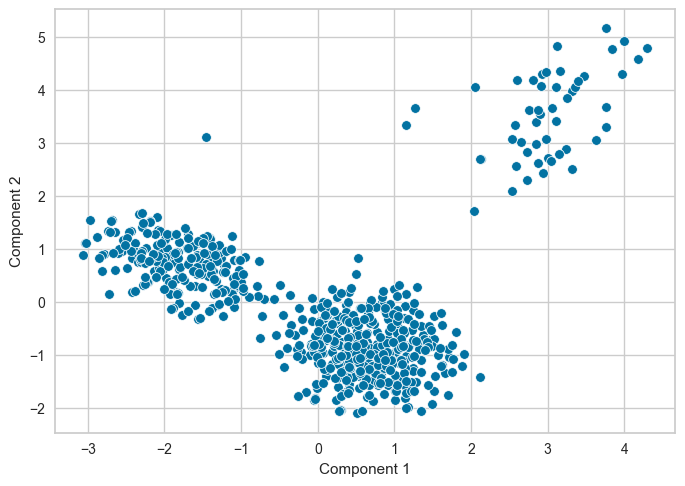

In [81]:
sns.scatterplot(data=reduced_data_df_pca, x="Component 1", y="Component 2")

The data points are clustered into three distinct groups: one large cluster in the bottom-left, another smaller cluster in the top-right, and a more spread-out group in between. There is also an isolated point in the middle of the plot, above the main cluster.

In [82]:
# Step 3: Apply KMeans on the PCA-transformed data
kmeans = KMeans(n_clusters=2, random_state=1)
kmeans.fit(reduced_data_df_pca)
labels = kmeans.labels_

<Axes: xlabel='Component 1', ylabel='Component 2'>

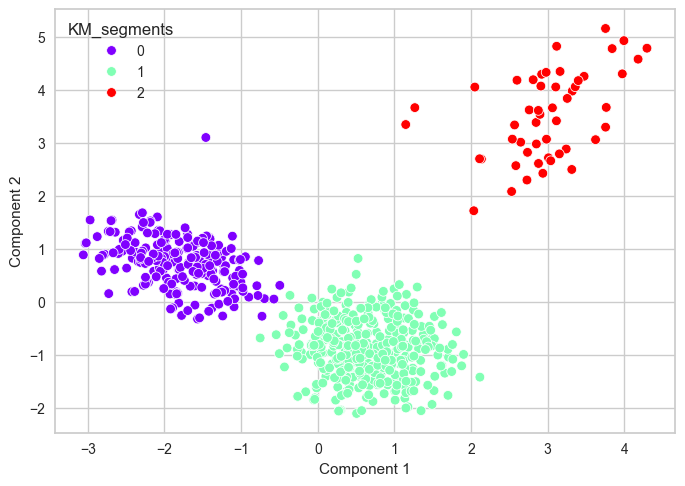

In [83]:
# Step 4: Add labels back to the original data (optional)
df['Cluster'] = labels

# Step 5: Plotting the clusters
sns.scatterplot(
    data=reduced_data_df_pca,
    x="Component 1",
    y="Component 2",
    hue=km_df["KM_segments"],
    palette="rainbow",
)

- Cluster 0 (purple): This group is positioned in the bottom-left area of the plot.
- Cluster 1 (light green): This group is centered near the bottom-middle of the plot.
- Cluster 2 (red): This group is found in the top-right section of the plot.
- The K-means algorithm has successfully divided the data into three clusters, corresponding to the visible groups from the previous plot.
- The isolated points from the earlier plot are now included in the appropriate clusters, with one point in the purple segment (Cluster 0).

<Axes: xlabel='Component 1', ylabel='Component 2'>

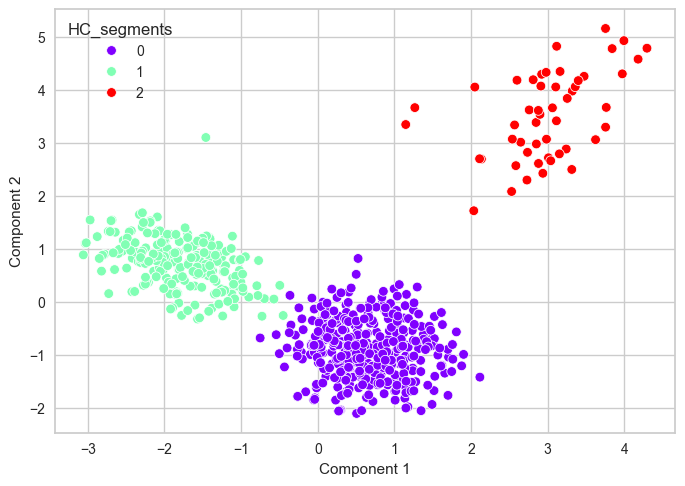

In [84]:
sns.scatterplot(
    data=reduced_data_df_pca,
    x="Component 1",
    y="Component 2",
    hue=hc_df["HC_segments"],
    palette="rainbow",
)

* Cluster 0 (purple): Positioned in the bottom-right area of the plot.
* Cluster 1 (light green): Located in the bottom-left and middle-left regions.
* Cluster 2 (red): Found in the top-right section of the plot.

#### Comparing the K-means and hierarchical clustering 

- Cluster 0 (purple) includes a few more points on the left than before.
- Cluster 1 (green) contains more points in the upper middle.
- While both K-means and hierarchical clustering generally identified the same three groups, the exact partitioning differs slightly.
- Hierarchical clustering seems to reflect a slightly different structure in the transition areas between the clusters.

## Actionable Insights & Recommendations

Actionable Insights:
Segment 2 (High-Value, Digital-Engaged Customers):

Profile: This segment exhibits the highest financial activity (credit limits and credit cards) and is highly engaged with online services. However, they tend to visit the bank less frequently and make fewer calls.
Actionable Insight: These are likely high-net-worth, tech-savvy customers who prefer digital interactions. Their preference for online channels can be leveraged to offer premium digital services, such as virtual financial advisory or exclusive offers via online platforms.
Segment 1 (Moderate-Value, Physically Engaged Customers):

Profile: This segment has moderate financial activity and is balanced between online and offline engagement. They visit the bank more often than other segments but are still reasonably active online.
Actionable Insight: This group could benefit from targeted offers that balance both in-branch and online services. For instance, promoting hybrid financial services such as in-person advisory sessions followed by ongoing digital communication can strengthen engagement.
Segment 0 (Low-Value, High-Contact Customers):

Profile: This group has lower financial activity but prefers physical interactions, making more calls and visiting the bank more frequently. They engage the least with online services.
Actionable Insight: These customers may need more hand-holding and personalized service. Encourage digital adoption by offering incentives (e.g., discounts or exclusive digital tools) to use online banking or mobile apps. For those resistant to digital channels, ensure a seamless, high-quality in-person experience.

Recommendations:
Increase Digital Engagement for High-Value Segments:

For Segment 2, consider expanding the range of digital services, such as offering personalized mobile app dashboards, AI-powered financial advisors, or high-limit credit products with rewards tailored to online usage. This will deepen their engagement without requiring more physical interaction.
Provide Hybrid Service Models for Moderate-Value Customers:

Segment 1 can benefit from a combination of digital and in-person services. Tailor cross-channel marketing that emphasizes convenience, such as using online banking for routine tasks while reserving in-person services for more complex issues. Promote digital tools that complement physical visits (e.g., appointment scheduling through apps).
Focus on Personalization for Low-Value, High-Contact Customers:

For Segment 0, focus on creating personalized services that cater to their preference for human interaction. Consider assigning dedicated relationship managers or offering more telephone-based customer support. To reduce operational costs, incentivize this group to try online services through exclusive onboarding programs for mobile or web banking, easing their transition to digital.
Enhance Customer Education:

Across all segments, particularly Segment 0, provide educational content about the benefits of online and mobile banking. This could include webinars, tutorials, or one-on-one virtual sessions aimed at increasing comfort with digital tools.
Monitor Behavior for Future Segmentation:

Continuously monitor the behavior of these segments to identify changes, especially with efforts to push Segment 0 toward digital channels. Adjust marketing strategies based on evolving preferences and activity levels, ensuring that customer experience remains high for both digital and non-digital users.
By tailoring services and communication to each segment's behavior, you can improve customer satisfaction, optimize resource allocation, and increase the adoption of higher-margin digital services.